## Final Project Submission

* Student name: Laura Lewis
* Student pace: full time
* Scheduled project review date/time: 8 February 2019, 4pm GMT/11am EST
* Instructor name: Joe San Pietro
* Blog post URL:
***

**Project plan (OSEMN framework):**

Obtain:

- Import data using pandas read.csv
- Research and understand variables

Scrub:

- Null values
- Outliers
- Missing values - drop, keep or impute
- Removing rows or columns
- Converting formats

Explore:
- Transformation - standardisation and normalisation

Model:

Interpret:

# Project outline

Your notebook should contain 1 - 2 paragraphs briefly explaining your approach to this project through the OSEMN framework.

Plan - OSEMN

Overall aim - predict house prices in...

Questions - 1, 2, 3

***
# Obtaining the data

### _Importing the data_

In this section, the data (and libraries) will be imported and inspected to see if any initial adjustments are necessary e.g. changing the index. Any necessary research into the variables will also be conducted.

In [241]:
# Importing the libraries to be used in this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from datetime import datetime
plt.style.use('ggplot')
% matplotlib inline

In [2]:
kc = pd.read_csv('kc_house_data.csv') # Import csv
pd.set_option('display.max_columns', None) # Displays all columns. Can be reset with: pd.reset_option('display.max_columns')
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
kc.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,3,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


An id field is already included. A quick check can be run using value_counts to see whether these are unique values and could therefore be used as the index:

In [4]:
kc.id.value_counts().head()

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
Name: id, dtype: int64

In [5]:
kc.loc[kc['id'] == 795000620] # Checking one example of repeated id values

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17588,795000620,9/24/2014,115000.0,3,1.0,1080,6250,1.0,0.0,0.0,2,5,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250
17589,795000620,12/15/2014,124000.0,3,1.0,1080,6250,1.0,0.0,0.0,2,5,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250
17590,795000620,3/11/2015,157000.0,3,1.0,1080,6250,1.0,NaN,0.0,2,5,1080,0.0,1950,NaN,98168,47.5045,-122.33,1070,6250


Some id numbers are repeated because the same house was sold on several different dates, so this is not suitable as a primary key/index. It can therefore be dropped, as it does not give us any useful information for the purposes of this analysis.

In [6]:
kc.drop(['id'], axis=1, inplace=True)

### _Understanding the variables_

#### Column names and descriptions for Kings County Data Set, from `column_names.md`:
* **id** - unique identified for a house
* **date** - date house was sold
* **price** -  is prediction target
* **bedrooms** -  number of Bedrooms/House
* **bathrooms** -  number of bathrooms/bedrooms
* **sqft_living** -  square footage of the home
* **sqft_lot** -  square footage of the lot
* **floors** -  total floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

It is not immediately obvious what condition and grade refer to, and so these require further investigation. The King County website (https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) gives the following definitions. To summarise, building condition is rated on a 1-5 scale where 5 is highest, and building grade is rated on a 1-13 scale where 13 is highest.

**BUILDING CONDITION**

Relative to age and grade. Coded 1-5.

1 = Poor- Worn out. Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.

2 = Fair- Badly worn. Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.

3 = Average- Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.

4 = Good- No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.

5= Very Good- All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility. 

**BUILDING GRADE**

Represents the construction quality of improvements. Grades run from grade 1 to 13. Generally defined as:

1-3 Falls short of minimum building standards. Normally cabin or inferior structure.

4 Generally older, low quality construction. Does not meet code.

5 Low construction costs and workmanship. Small, simple design.

6 Lowest grade currently meeting building code. Low quality materials and simple designs.

7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.

8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

9 Better architectural design with extra interior and exterior design and quality.

10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc. 

***
# Scrubbing the data

In this section, the data will be pre-processed. This will include looking for null values, missing values, incorrect data types (e.g. numbers stored as strings, or categorical data stored as integers) and multicollinearity, and taking actions including dropping rows or columns, imputing values and casting data types.

### _Checking data types and null values_

#### Initial inspection

In [7]:
kc.info() # Inspect meta-data for the dataset, to see data types and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(10), object(2)
memory usage: 3.3+ MB


In [8]:
kc.describe() # Descriptive statistics for numerical columns

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
kc.isnull().sum() # Checking the number of null values in each column

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

An initial inspection reveals that there are 21,597 rows in the dataset. The dataset is not so large that it is worth sub-setting to speed up processing time.

There are 8 variables classed as floats, 11 as integers and 2 as string.

There are three ways that null or unknown values might be stored - as missing (null) values, or with a placeholder for unknown values (e.g. 'NA', 'Nan') entered as a string, or in numerical data as an unlikely numerical category. The view and yr_renovated variables contain the former.

#### Changes to data types and dealing with null values:

_Date_ - cast to datetime. A quick check reveals there is only one year represented in the dataset.

In [10]:
kc.date = pd.to_datetime(kc.date) # Using the pandas 'to_datetime' function to cast the string as a date
kc.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [11]:
print(kc.date.min())
print(kc.date.max())

2014-05-02 00:00:00
2015-05-27 00:00:00


_Bathrooms_ - presumably a float because .5 of a bathroom refers to a toilet and sink but no bath/shower, and 0.25 of a bathroom refers to just a toilet. Checking the unique values reveals that this is correct, and only legitimate decimals (.25, .5 and .75 for various bathroom fitting combinations) are used.

In [12]:
kc.bathrooms.unique() # Checking which unique values for bathroom appear

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

_Floors_ - currently stored as a float, but should it be an integer? However, after checking the unique values it seem that the only decimals used are .5 mezzanines are used, so this is ok to leave as a float.

In [13]:
kc.floors.unique() # Checking which unique values for floors appear

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

_Waterfront_ - currently stored as a float. Checking the values reveals that this is a boolean variable with 1s and 0s (and some null values), and so it should be cast to a string rather than storing it as a float. Null values were replaced with 0 (the median and mode).

In [14]:
kc.waterfront.value_counts() # Checking category counts

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [15]:
kc.waterfront.isna().sum()

2376

In [16]:
kc.waterfront.fillna(0, inplace=True) # Replace all null values in waterfront with 0

In [17]:
kc.waterfront.value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

In [18]:
kc.waterfront = kc.waterfront.astype('str') # Casting the waterfront column to a string

_View_ - currently stored as a float, but defined as 'has been viewed' which implies a boolean variable for whether or not a property has been viewed. However, checking the unique values reveals that this is not the case - values are 0, 1, 2, 3, 4 and nan. It could be the number of times a property has been viewed, but the low max and cardinality suggest not. The most likely explanation is that it is another integer grading system similar to condition and grade. Research online for other analyses of this dataset provides both definitions, but the latter (a grading of the view quality from 0-4, with 4 being the highest) is the most commonly accepted and will be used. Counts of rows in each view category reveals that the vast majority (90%) of entries have a view of 0. Null values will be replaced with 0, and the datatype will be cast to integer.

In [19]:
kc.view.unique() # Checking which unique values for view appear

array([ 0., nan,  3.,  4.,  2.,  1.])

In [20]:
print(kc.view.value_counts()) # Counts of rows for each possible value for view
print((kc.view.value_counts().head(1)/kc.view.value_counts().sum())*100) # Percentage of rows in the most common view category

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64
0.0    90.192254
Name: view, dtype: float64


In [21]:
kc.view.fillna(0, inplace=True)

In [22]:
kc.view.value_counts()

0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [23]:
kc['view'] = kc['view'].astype('int64')

*Sqft_basement* - should be an integer (or possibly float) as with other sqft measurements. However, attempting to cast it to an integer produces an error, because some values contain text (making this a string variable). The row counts for each unique value reveal that 454 rows have a sqft_basment value of '?', hence this error. This represents 2.1% of data, so it is not worth removing the column. The options for dealing with this are: drop the rows containing '?', replace them with the column average (in this case a value of 0 would be most appropriate, as this is over half of the values and so would be both the mode and the median), or use coarse classification to bin the data and use ? as a category. Dropping data loses data and binning data reduces granularity of data. In this case, given that the majority of entries contain the same value (0), it is relatively safe to replace missing values with 0.

In [24]:
kc.sqft_basement.value_counts().sort_values(ascending=False) # Counts of rows for each possible value of sqft_basement

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
900.0       142
300.0       142
200.0       105
750.0       104
480.0       103
450.0       103
530.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
1100.0       78
670.0        78
780.0        76
550.0        76
650.0        75
240.0        74
380.0        73
680.0        73
360.0        72
          ...  
1852.0        1
666.0         1
1248.0        1
516.0         1
1275.0        1
1913.0        1
1548.0        1
652.0         1
2400.0        1
3000.0        1
2180.0        1
1284.0        1
792.0         1
4130.0        1
946.0         1
915.0         1
861.0         1
295.0         1
906.0         1
225.0         1
207.0         1
2810.0        1
2190.0        1
506.0         1
3480.0        1
1135.0        1
417.0         1
1960.0        1
1481.0        1
20.0          1
Name: sqft_basement, Len

In [25]:
kc.loc[kc['sqft_basement'] == '?', 'sqft_basement'] = 0 # Replace all values of '?' with 0
kc.sqft_basement = kc.sqft_basement.astype('float').astype('int64') # Cast to integer (via float to deal with '0.0')
kc.sqft_basement.dtype # Confirm type is correctly cast

dtype('int64')

*Yr_renovated* - should be an integer rather than a float, as with yr_built. However, there are 3,842 null values. This would be too many rows to remove from the dataset (17.8%). It is not possible to replace them with the mean year, because this could result in renovation years being prior to build years, which is impossible. Binning would reduce the granularity of data. One option would be to replace the null values with the year that represents the average amount of time between building and renovating a property. However, the easiest solution in this option is to replace the null values with the mode value 0.

In [26]:
kc.yr_renovated.unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [27]:
kc.yr_renovated.isna().sum() # Number of null values

3842

In [28]:
kc.yr_renovated.value_counts().sort_values(ascending=False)

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
2010.0       15
1983.0       15
2001.0       15
1999.0       15
2008.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1955.0        3
1956.0        3
1972.0        3
1945.0        3
1960.0        3
1958.0        3
1978.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1976.0        1
1971.0        1
1959.0        1
1946.0        1
1948.0        1
1951.0        1
1944.0        1
1934.0        1
1950.0        1
1953.0        1
1954.0        1
Name: yr_renovated, Leng

In [29]:
kc.yr_renovated.fillna(0, inplace=True) # Replace all null values in yr_renovated with 0
kc.yr_renovated = kc.yr_renovated.astype('int64') # Casting the yr_renovated column to an integer
kc.yr_renovated.dtype # Confirm type is correctly cast

dtype('int64')

_Zipcode_ - currently stored as an integer, but should be a string as these is a categorical rather than a continuous variable. A check of unique values reveals no '?'s or other missing value placeholders.

In [30]:
kc.zipcode = kc.zipcode.astype('str')

In [31]:
kc.zipcode.unique()

array(['98178', '98125', '98028', '98136', '98074', '98053', '98003',
       '98198', '98146', '98038', '98007', '98115', '98107', '98126',
       '98019', '98103', '98002', '98133', '98040', '98092', '98030',
       '98119', '98112', '98052', '98027', '98117', '98058', '98001',
       '98056', '98166', '98023', '98070', '98148', '98105', '98042',
       '98008', '98059', '98122', '98144', '98004', '98005', '98034',
       '98075', '98116', '98010', '98118', '98199', '98032', '98045',
       '98102', '98077', '98108', '98168', '98177', '98065', '98029',
       '98006', '98109', '98022', '98033', '98155', '98024', '98011',
       '98031', '98106', '98072', '98188', '98014', '98055', '98039'],
      dtype=object)

Some of the sqft measurements might be related to each other, which could cause problems in modelling because it would result in two variables producing the same effect. The main possibility is that sqft_living is the sum of sqft_above and sqft_basement. However, a comparison reveals that this is not always the case, and that there are some discrepancies in numbers. Therefore sqft_living will not be dropped as these discrepancies may be useful information (although it is also possible that they are errors).

In [32]:
kc['sqft_living2'] = kc.sqft_above + kc.sqft_basement

In [33]:
kc['sqft_diff'] = kc.sqft_living - kc.sqft_living2

In [34]:
kc.sqft_diff.value_counts().head()

0       21427
700        10
800         5
500         5
1010        5
Name: sqft_diff, dtype: int64

In [35]:
kc.sqft_living.equals(kc.sqft_living2)

False

In [36]:
kc.drop('sqft_living2', axis=1, inplace=True)
kc.drop('sqft_diff', axis=1, inplace=True)

A final check of data types:

In [37]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null object
view             21597 non-null int64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null int64
zipcode          21597 non-null object
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(12), object(2)
memory usage: 3.3+ MB


A final check for null values:

In [38]:
kc.isna().sum().sum()

0

### _Checking for multicollinearity_

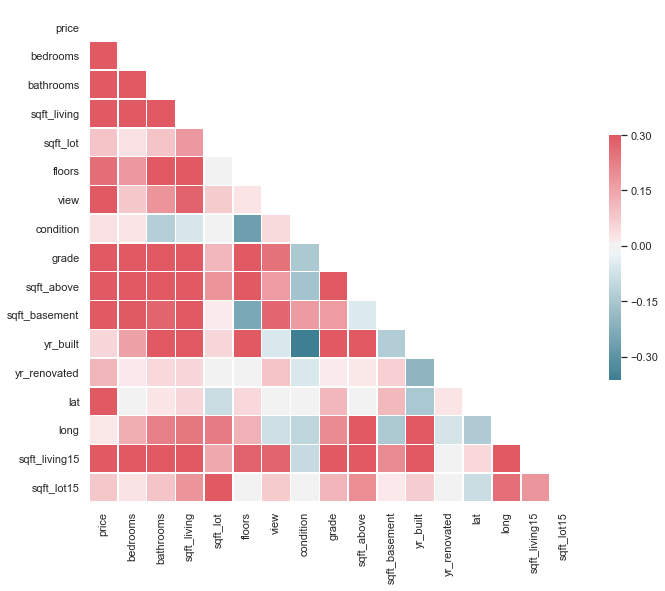

In [39]:
# Set the style of the visualization
sns.set(style="white")

# Create a covariance matrix
corr = kc.corr()

# Generate a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11,9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5});

There are quite a few columns that are mildly correlated with each other, including several that appear to be share about 30% of their variation with the target variable (price). However, no variables are so strongly correlated that they need to be removed.

***
# Exploring the data

In this section, exploratory data analysis will be conducted, as will any additional pre-processing/cleaning tasks that become apparently. This will include inspecting distributions, checking for outliers in continuous numerical data, transformation (standardisation/normalisation), one-hot encoding, and checking the dataset meets the assumptions required for linear regression.

### _Inspecting distributions and conducting transformations_

The histograms below show the distributions for each variable.

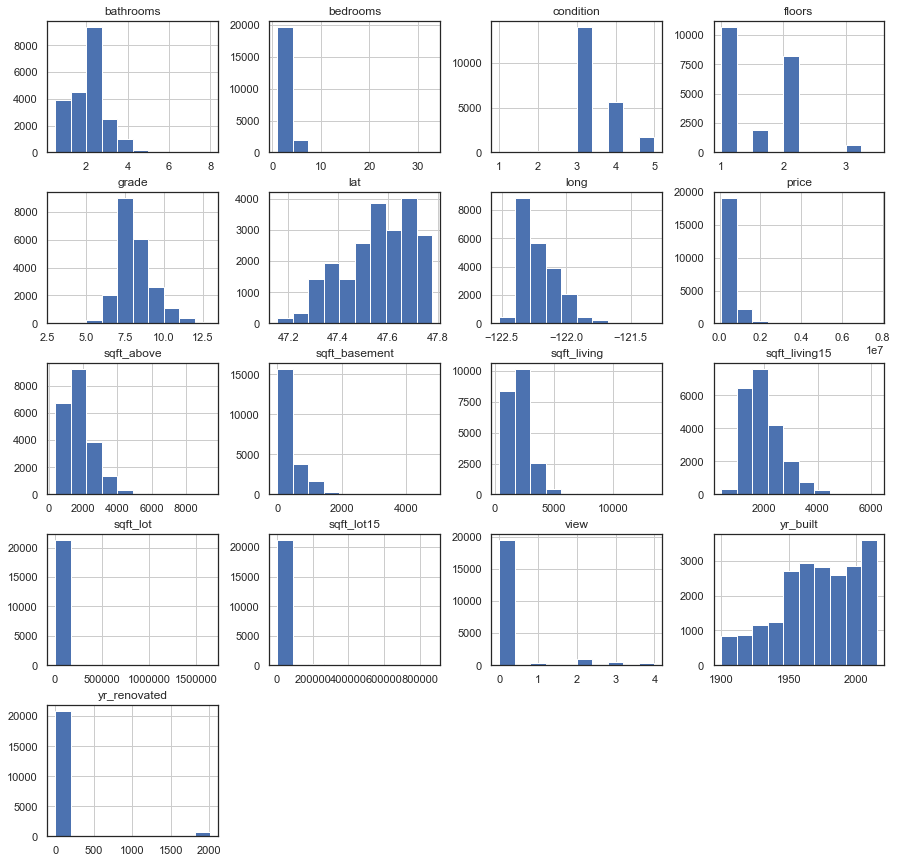

In [40]:
kc.hist(figsize=(15,15));

#### Initial visual inspection of distributions:

- Bathrooms and grade are fairly normally distributed
- Bedrooms has some high outliers which require additional inspection and possibly log transformation
- Condition, floors and view have only a small number of groupings and are not normally distributed
- Latitude is roughly normally distributed but negatively skewed
- Longitude, sqft_above, sqft_basement, sqft_living and sqft_living15 are roughly normally distributed but positively skewed, and may require log transformation
- Price is heavily positively skewed and will require log transformation
- Sqft_lot, sqft_lot15 and yr_renovated appear to have some high outliers which require additional inspection and possibly log transformation
- Yr_built is not very normally distributed, and is negatively skewed

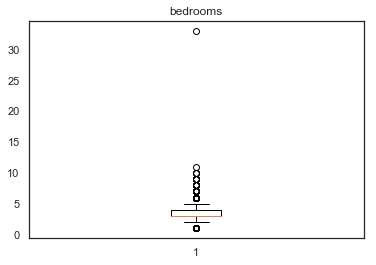

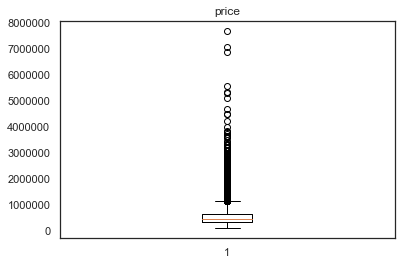

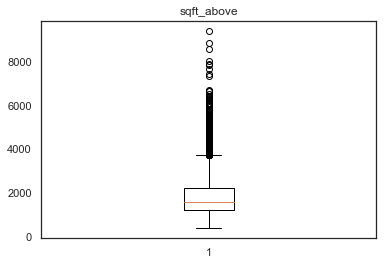

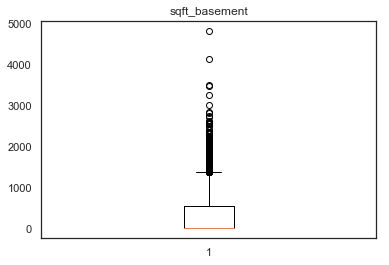

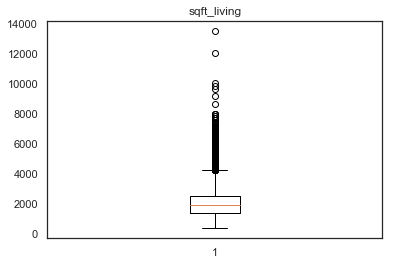

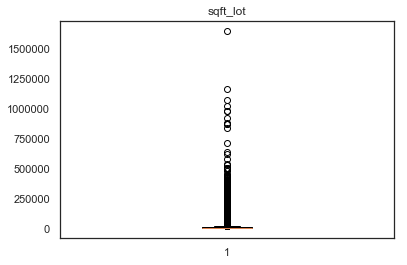

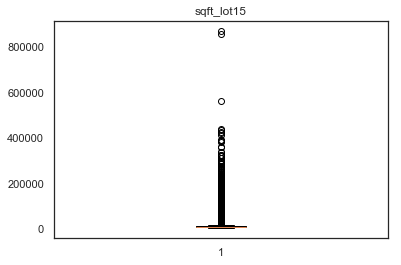

In [41]:
# Examining the distributions via boxplots for the heavily positively skewed distributions above, to see if there are any extreme outliers
for col in ['bedrooms', 'price', 'sqft_above', 'sqft_basement', 'sqft_living', 'sqft_lot', 'sqft_lot15']:
    plt.boxplot(kc[col])
    plt.title(col)
    plt.show()

The boxplots above show that most of the variables plotted have very long tails, i.e. there are a very small number of very large properties. The main candidate for an actual outlier is one property with 33 bedrooms. As this is three times the number of bedrooms of the next largest property (and enough bedrooms to be a hotel), this may be data entry error, e.g. someone accidentally entering 3 instead of 33. Looking up the rest of the data for this house (below), this does appear to be a data entry error - a 33 bedroom property could not have 1.75 bathrooms or fit into 1620 square feet on one floor. Therefore it is reasonable to change this to a bedroom number of 3.

In [42]:
kc.bedrooms.value_counts() # Checking the value for the property with a very large number of bedrooms

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [43]:
kc.loc[kc.bedrooms == 33]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0.0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [44]:
kc.loc[kc.bedrooms == 33, 'bedrooms'] = 3

In [45]:
kc.loc[kc.index == 15856] # Confirm change

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2014-06-25,640000.0,3,1.75,1620,6000,1.0,0.0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


#### Log-transformation:

Potential candidates for log-transformation are: bathrooms, bedrooms, grade, long, price, sqft_above, sqft_basement, sqft_living, sqft_living15, sqft_lot, sqft_lot15, yr_renovated. However, sqft_basement and yr_renovated contain values of 0, and longitude contains negative numbers, so they cannot be log transformed. A new dataframe with columns for log-transformed versions of these variables will be created.

In [46]:
kc.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.371811,2.115826,2080.321850,1.509941e+04,1.494096,0.233181,3.409825,7.657915,1788.596842,285.716581,1970.999676,68.758207,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.904096,0.768984,918.106125,4.141264e+04,0.539683,0.764673,0.650546,1.173200,827.759761,439.819830,29.375234,364.037499,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


In [47]:
kc.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Date will now be dropped, as this cannot help us predict sale prices in the future, and the dataset only spans one year anyway. For the initial version of the model, zipcode will also be dropped, as geography is already represented in the dataset by latitude and longitude. These two variables are continuous and can be transformed, whereas zipcode is categorical and would result in a large number of dummy variables, which may result in less robust models. Later, after an initial model is produced using mostly continuous variables, zipcode will be added back in using one-hot encoding, and its impact will be investigated.

In [48]:
kc_log = kc.drop(['date', 'zipcode'], axis=1) # Dropping date and zipcode as these will not be transformed
for col in ['bathrooms', 'bedrooms', 'grade', 'price', 'sqft_above', 'sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15']:
    kc_log[col] = np.log(kc_log[col])

#### Feature scaling:

The variables are still on different order of magnitude, so some form of feature scaling is required. MinMax scaling using sklearn will be used, in order to coerce each variable into the range 0-1.

In [49]:
kc_log.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,13.048211,1.177708,0.677623,7.550720,8.989805,1.494096,0.233181,3.409825,2.024455,7.395148,285.716581,1970.999676,68.758207,47.560093,-122.213982,7.539494,8.960758
std,0.526555,0.282728,0.392481,0.424191,0.902078,0.539683,0.764673,0.650546,0.149345,0.427140,439.819830,29.375234,364.037499,0.138552,0.140724,0.327467,0.812613
min,11.264464,0.000000,-0.693147,5.913503,6.253829,1.000000,0.000000,1.000000,1.098612,5.913503,0.000000,1900.000000,0.000000,47.155900,-122.519000,5.988961,6.478510
25%,12.682307,1.098612,0.559616,7.265430,8.525161,1.000000,0.000000,3.000000,1.945910,7.081709,0.000000,1951.000000,0.000000,47.471100,-122.328000,7.306531,8.536996
50%,13.017003,1.098612,0.810930,7.554859,8.938269,1.500000,0.000000,3.000000,1.945910,7.352441,0.000000,1975.000000,0.000000,47.571800,-122.231000,7.517521,8.938532
75%,13.377006,1.386294,0.916291,7.843849,9.276596,2.000000,0.000000,4.000000,2.079442,7.700748,550.000000,1997.000000,0.000000,47.678000,-122.125000,7.766417,9.218606
max,15.856731,2.397895,2.079442,9.513404,14.317109,3.500000,4.000000,5.000000,2.564949,9.149528,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,8.733916,13.677627


In [50]:
kc_log.describe().columns # Get column names for transformation

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [51]:
# Min-max scale variables
transformer = MinMaxScaler()
kc_log[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']] = transformer.fit_transform(kc_log[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']])

C:\Users\Laura\Anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [52]:
kc_log.describe() # Confirm min-max transformation

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,0.388424,0.491142,0.494401,0.454795,0.339313,0.197639,0.058295,0.602456,0.631399,0.457860,0.059277,0.617388,0.034123,0.650142,0.253337,0.564866,0.344799
std,0.114661,0.117907,0.141558,0.117834,0.111875,0.215873,0.191168,0.162636,0.101849,0.131995,0.091249,0.255437,0.180664,0.222860,0.116880,0.119298,0.112877
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.308746,0.458157,0.451839,0.375546,0.281688,0.000000,0.000000,0.500000,0.577833,0.361000,0.000000,0.443478,0.000000,0.506997,0.158638,0.479997,0.285936
50%,0.381628,0.458157,0.542481,0.455945,0.332922,0.200000,0.000000,0.500000,0.577833,0.444662,0.000000,0.652174,0.000000,0.668972,0.239203,0.556861,0.341712
75%,0.460022,0.578130,0.580482,0.536222,0.374881,0.400000,0.000000,0.750000,0.668898,0.552296,0.114108,0.843478,0.000000,0.839794,0.327243,0.647535,0.380616
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Displots are plotted below using seaborn, to assess the distributions and normality of the newly-transformed data. The target variable price is now normally distributed. The predictor variables sqft_living, sqft_lot, grade, sqft_above, sqft_living15 and sqft_lot15 also now look normally distributed, and are strong candidates for good explanatory variables in the modeling stage.

C:\Users\Laura\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


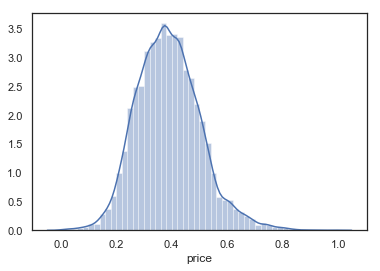

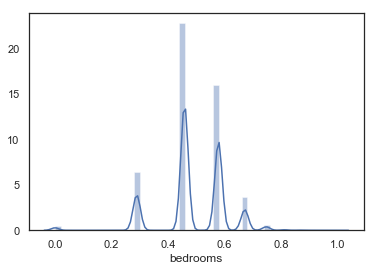

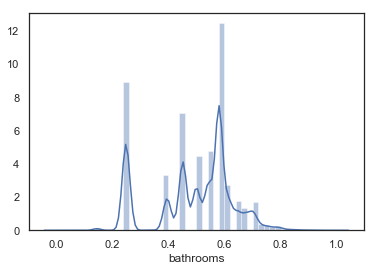

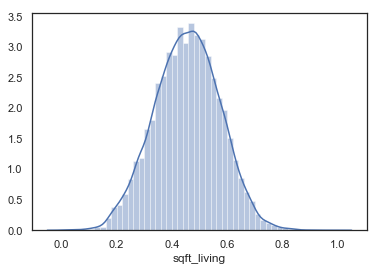

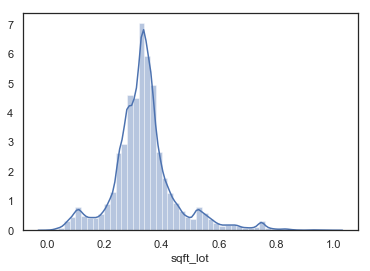

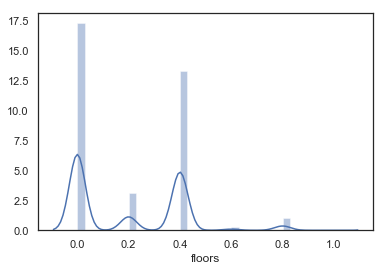

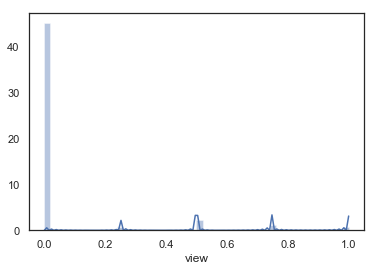

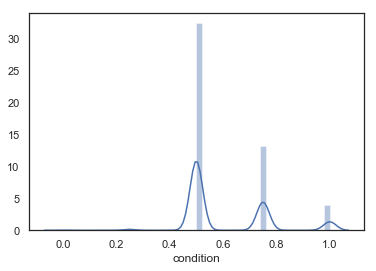

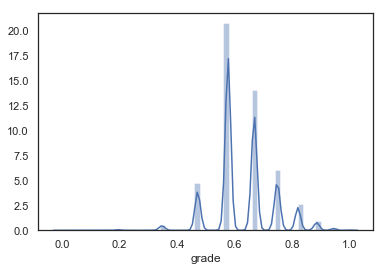

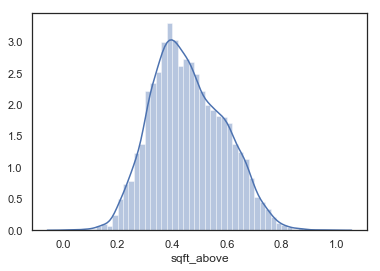

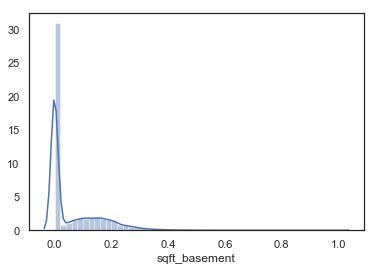

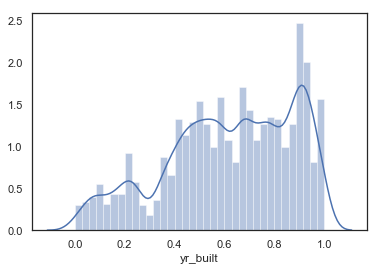

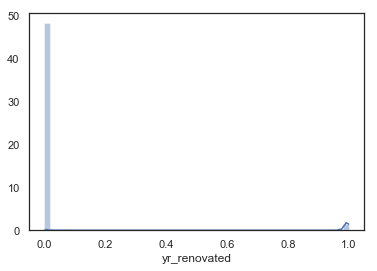

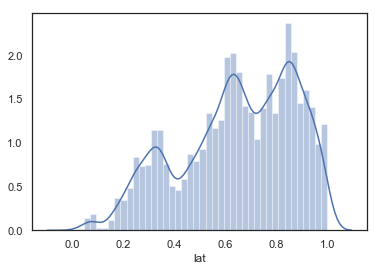

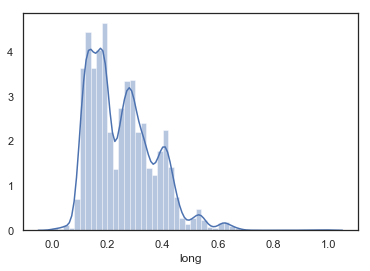

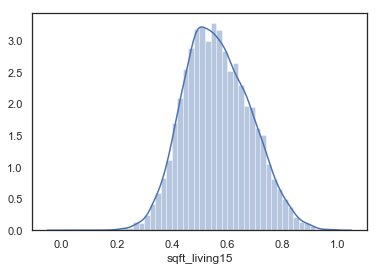

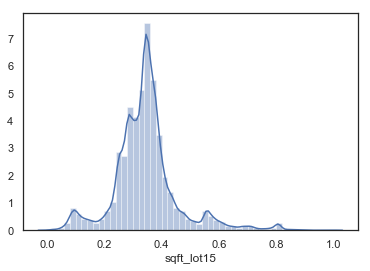

In [53]:
# Plotting sns.distplots for log-transformed variables 
for col in kc_log[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]:
    plt.figure()
    sns.distplot(kc_log[col])
    plt.show()

Yr_renovated will be dropped as there are so many 0 values in this variable that it will not be possible to transform it into being normally distributed.

In [54]:
kc_log.drop(['yr_renovated'], axis=1, inplace=True)

### _One-hot encoding_

At this point, the categorial variable waterfront can be one-hot encoded, to produce columns for 1 (yes) and 0 (no).

In [55]:
waterfront_dummies = pd.get_dummies(kc_log['waterfront'], prefix='waterfront') # Get dummies
kc_log.drop(['waterfront'], axis=1, inplace=True) # Drop original waterfront column
kc_log = pd.concat([kc_log, waterfront_dummies], axis=1) # Add dummy variables to original dataset
kc_log.rename(columns={'waterfront_0.0':'waterfront_no', 'waterfront_1.0':'waterfront_yes'}, inplace=True)
kc_log.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,waterfront_no,waterfront_yes
0,0.227669,0.458157,0.250000,0.322166,0.295858,0.0,0.0,0.5,0.577833,0.358392,0.000000,0.478261,0.571498,0.217608,0.441342,0.300162,1,0
1,0.420522,0.458157,0.542481,0.538392,0.326644,0.4,0.0,0.5,0.577833,0.546652,0.082988,0.443478,0.908959,0.166113,0.525882,0.342058,1,0
2,0.182099,0.289065,0.250000,0.203585,0.366664,0.0,0.0,0.5,0.472707,0.226478,0.000000,0.286957,0.936143,0.237542,0.699256,0.349544,1,0
3,0.445720,0.578130,0.646241,0.463123,0.280700,0.0,0.0,1.0,0.577833,0.322322,0.188797,0.565217,0.586939,0.104651,0.446739,0.283185,1,0
4,0.408883,0.458157,0.500000,0.420302,0.340224,0.0,0.0,0.5,0.668898,0.467563,0.000000,0.756522,0.741354,0.393688,0.548854,0.339562,1,0


### _Checking the assumptions for linear regression_

In order to conduct regression analysis, certain assumptions must be met. The normality assumption has already been partly tested above using histograms and distplots, and this will be confirmed with Q-Q plots and the Jarque-Bera test. The linearity assumption between the predictor variables and the target variable will also be tested, as will heteroscedasticity (including with the Goldfeld-Quandt test).

#### Normality assumption:

This will be tested with Q-Q plots and the Jarque-Bera (JB) test.

The Q-Q plots below and the results of the JB test reveal that none of the variables are normally distributed. However, for now we shall proceed with these variables to see whether a regression model can be made with any degree of predictive power, and this can be iterated on later. The top 5 most normally-distributed variables are sqft_living, sqft_above, grade, bathrooms and view.

Regression diagnostics for price~bedrooms


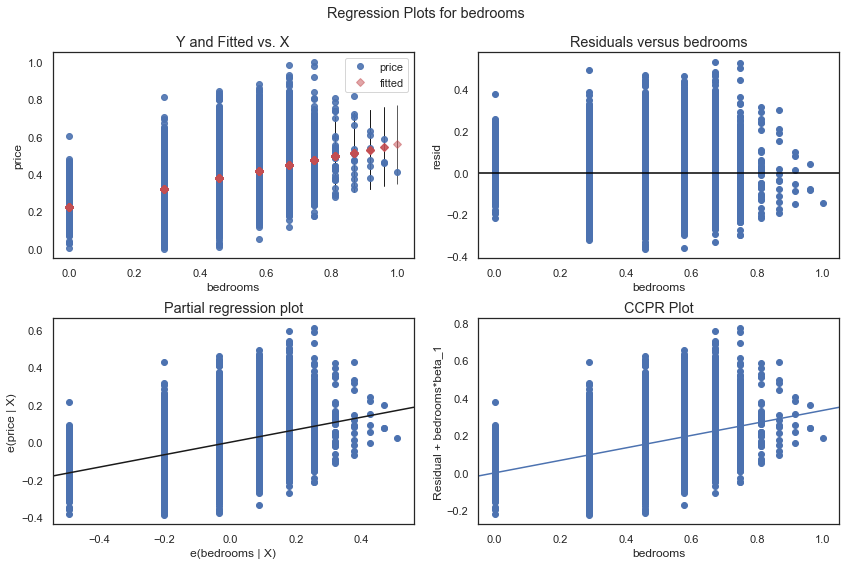

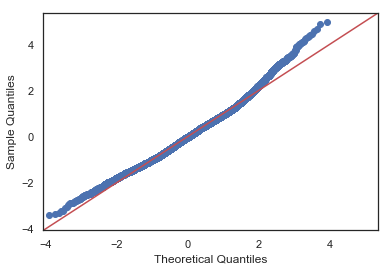

Regression diagnostics for price~bathrooms


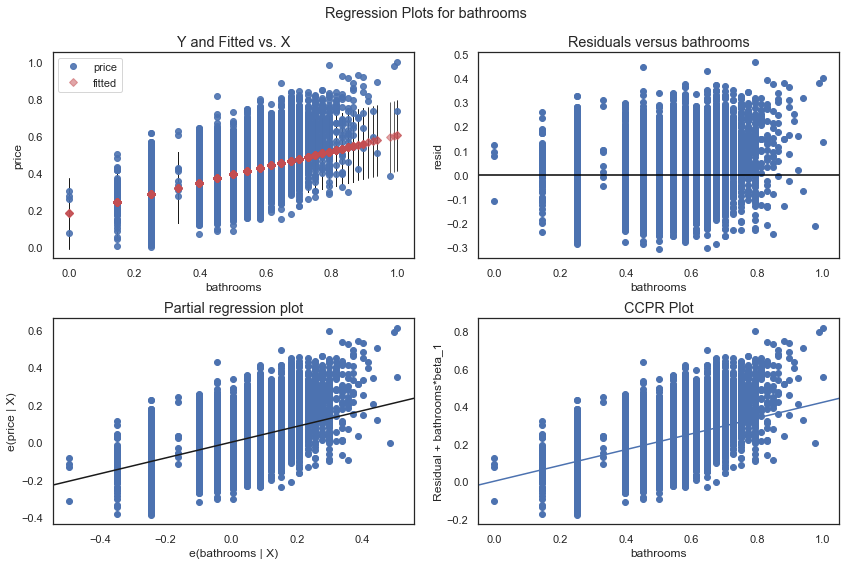

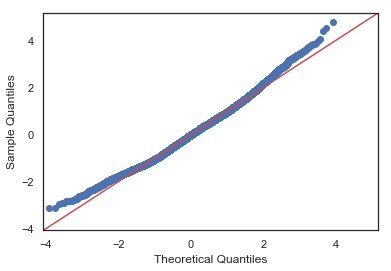

Regression diagnostics for price~sqft_living


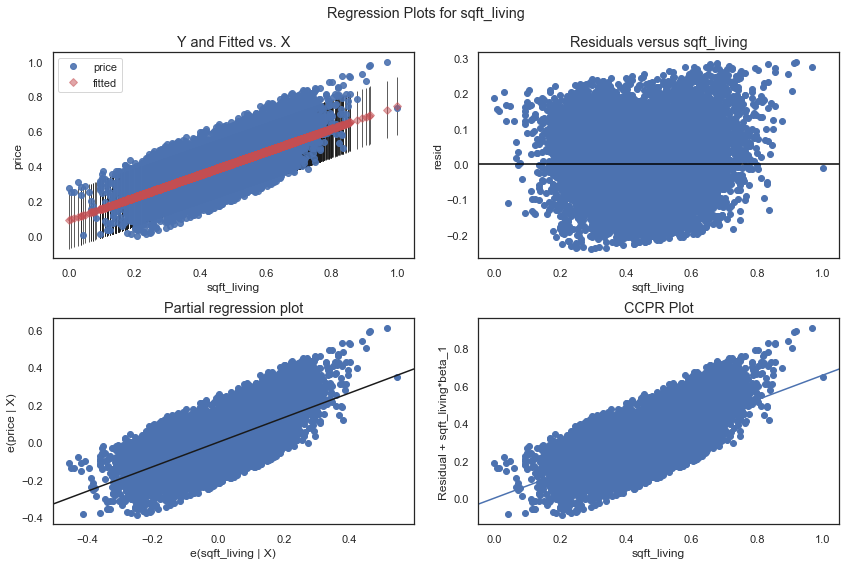

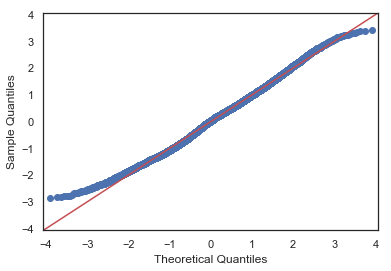

Regression diagnostics for price~sqft_lot


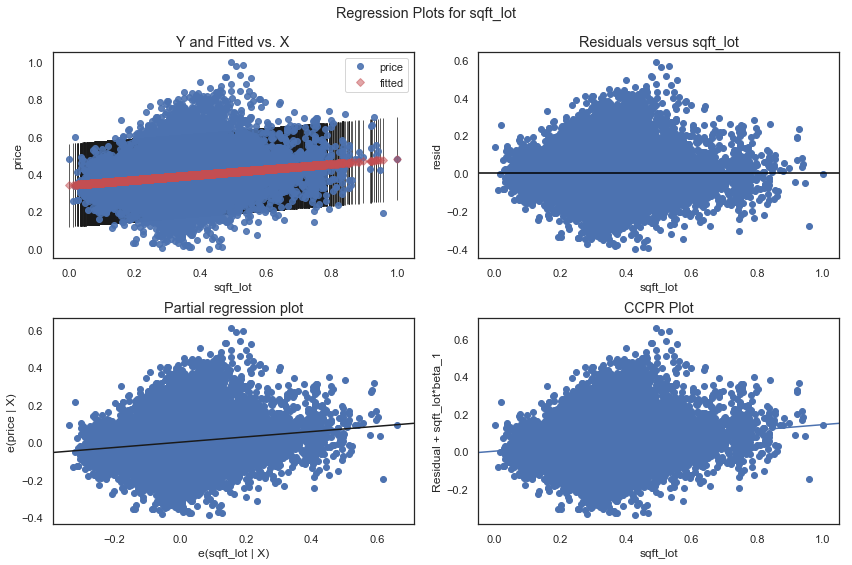

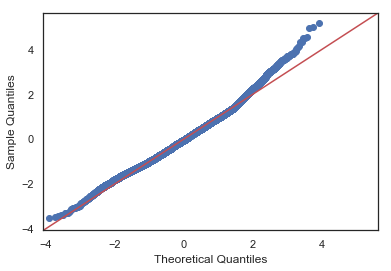

Regression diagnostics for price~floors


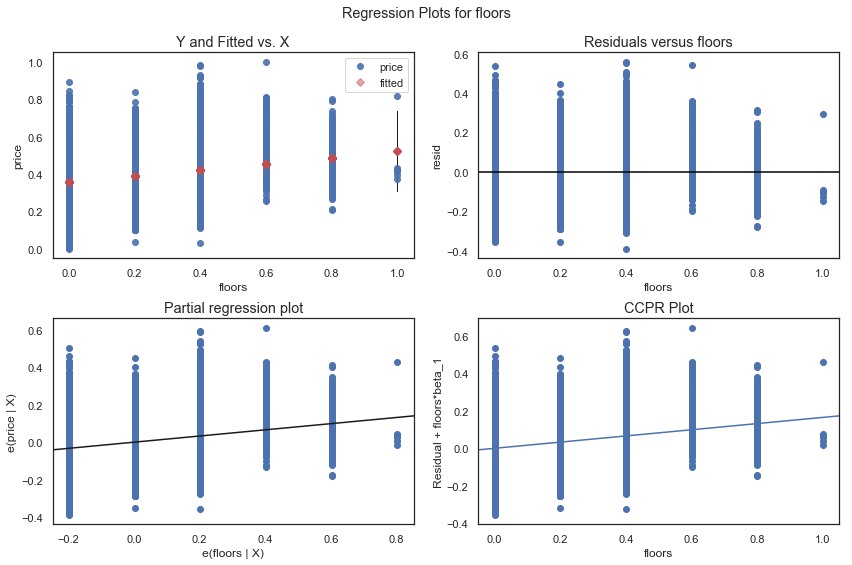

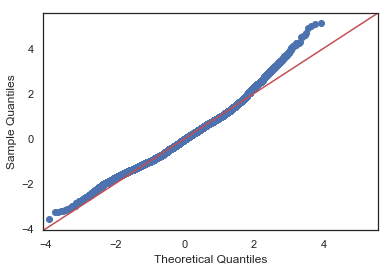

Regression diagnostics for price~view


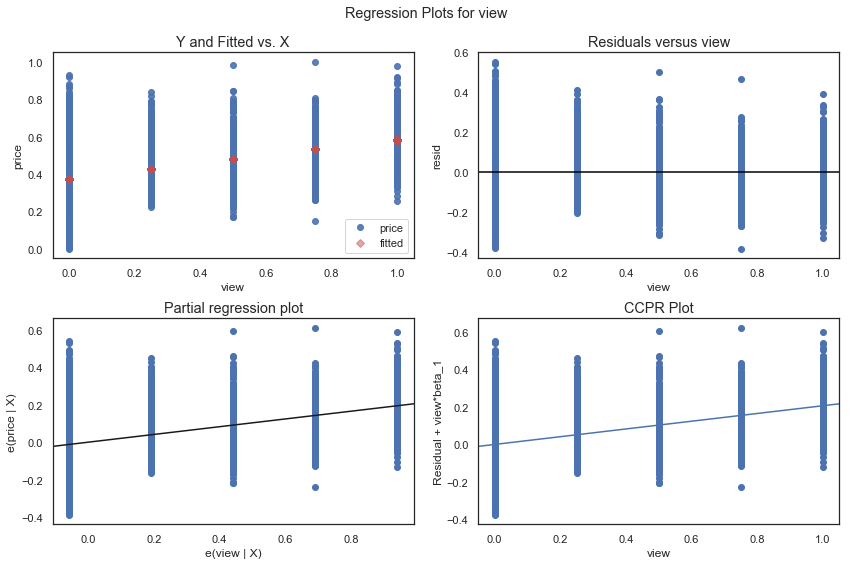

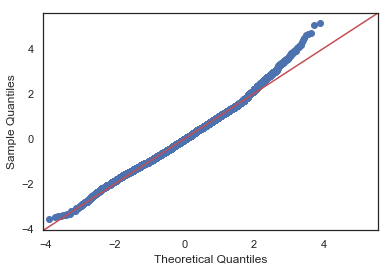

Regression diagnostics for price~condition


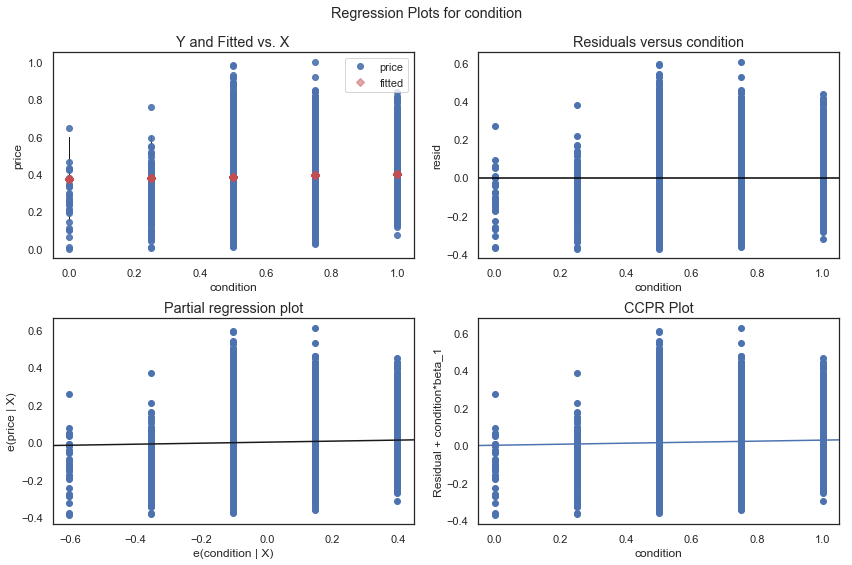

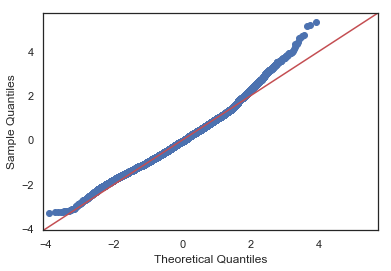

Regression diagnostics for price~grade


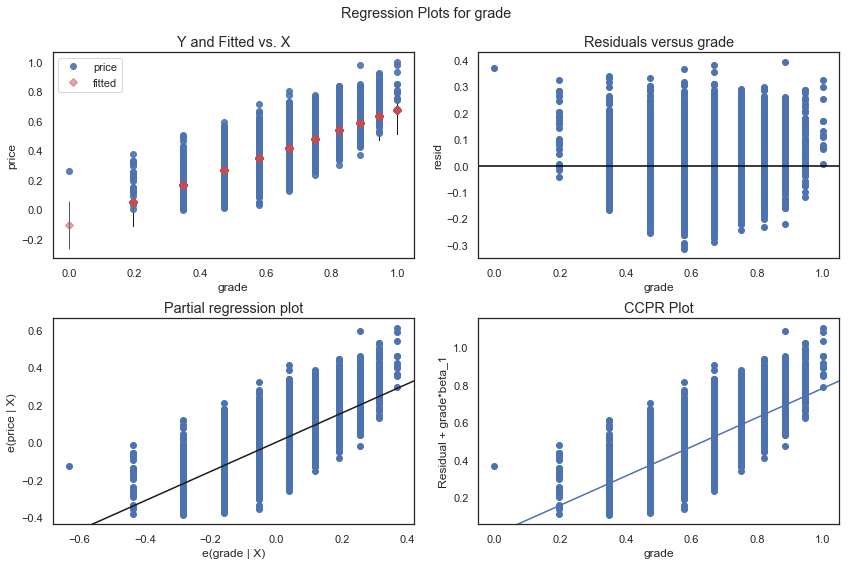

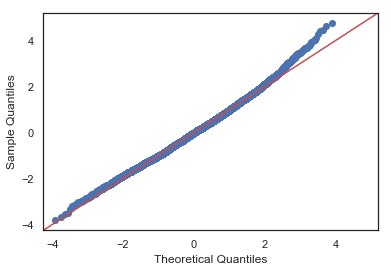

Regression diagnostics for price~sqft_above


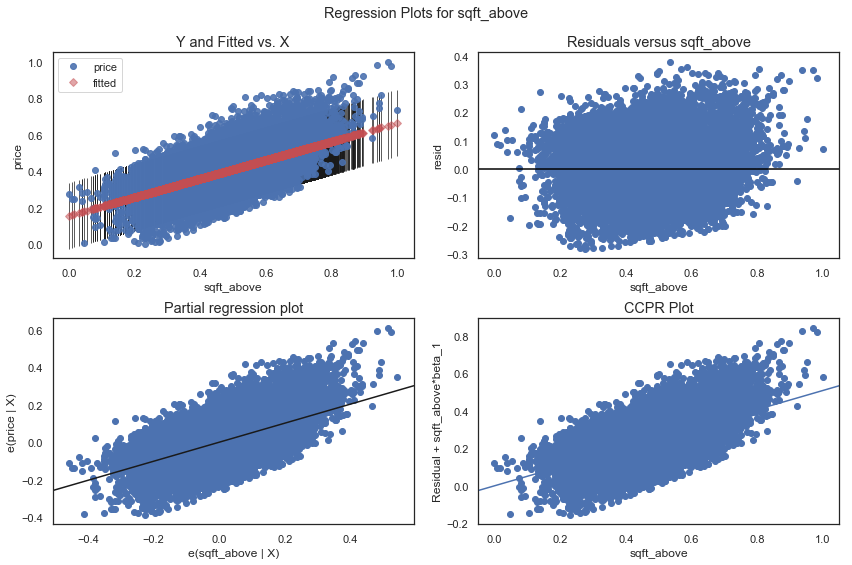

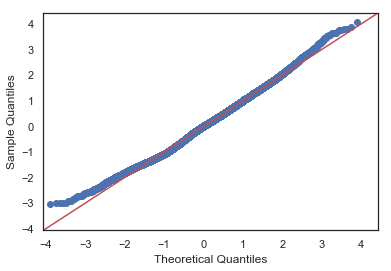

Regression diagnostics for price~sqft_basement


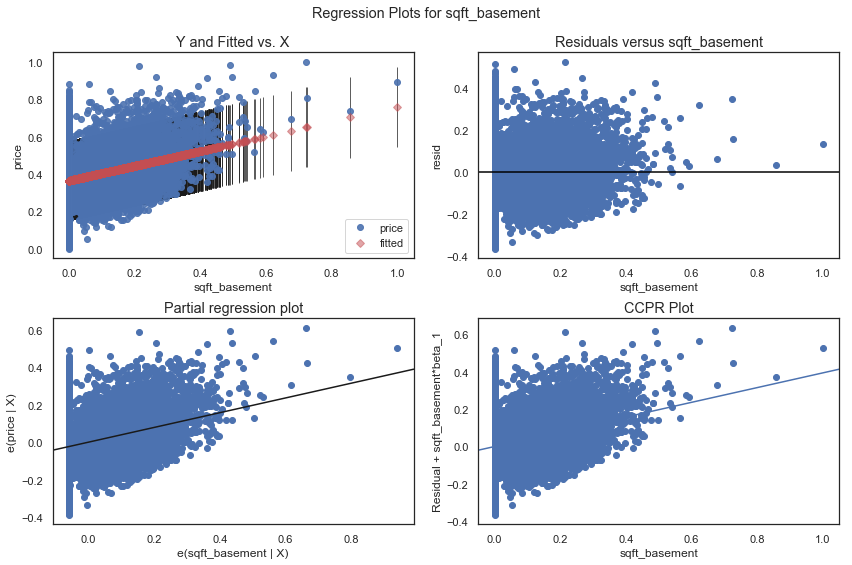

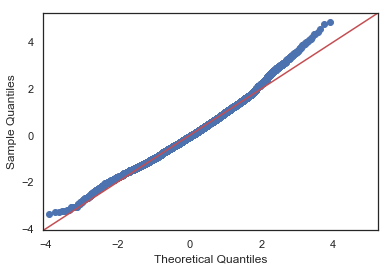

Regression diagnostics for price~yr_built


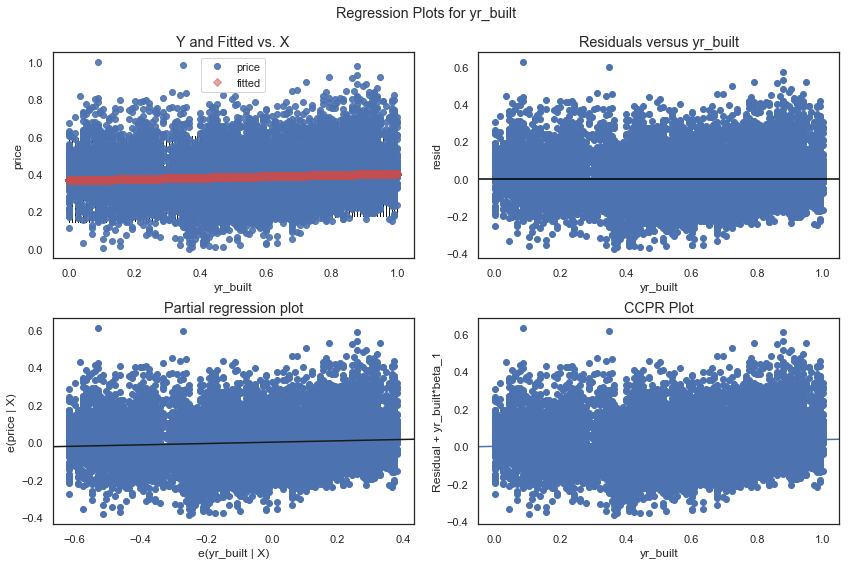

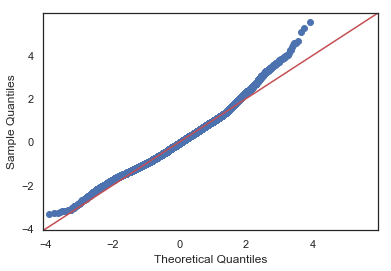

Regression diagnostics for price~lat


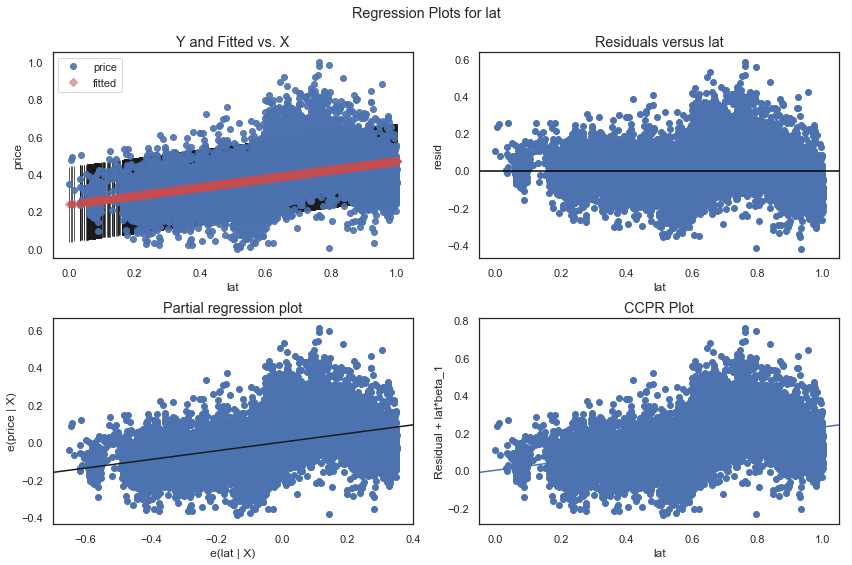

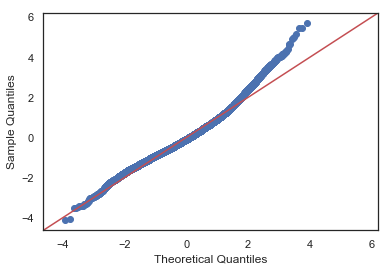

Regression diagnostics for price~long


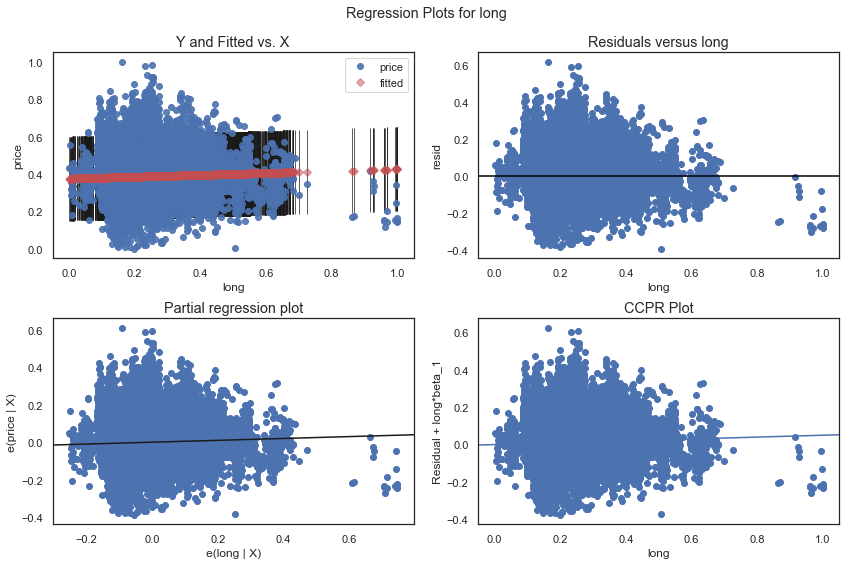

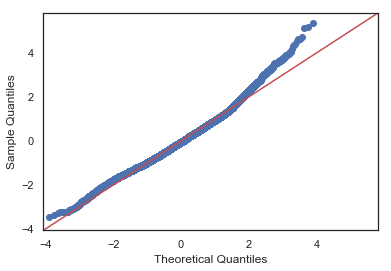

Regression diagnostics for price~sqft_living15


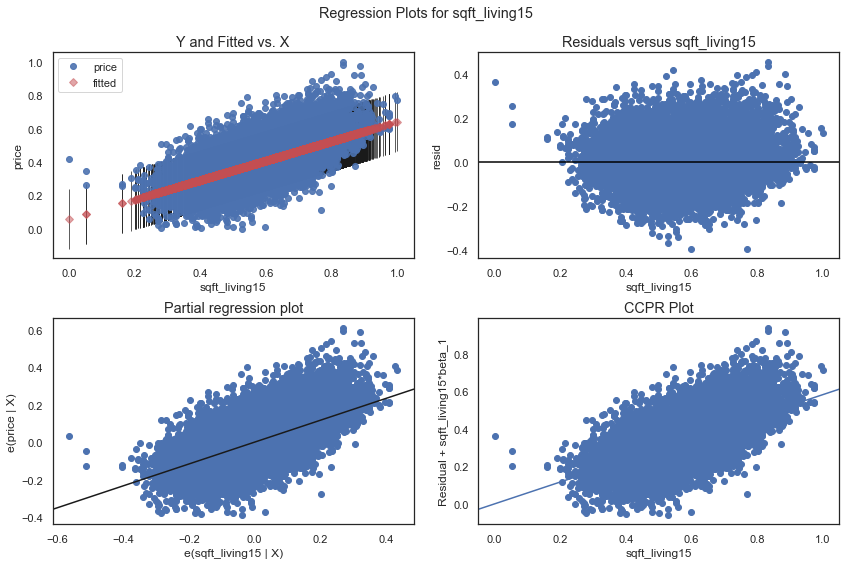

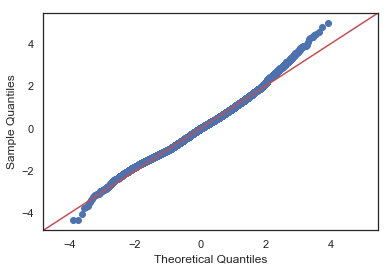

Regression diagnostics for price~sqft_lot15


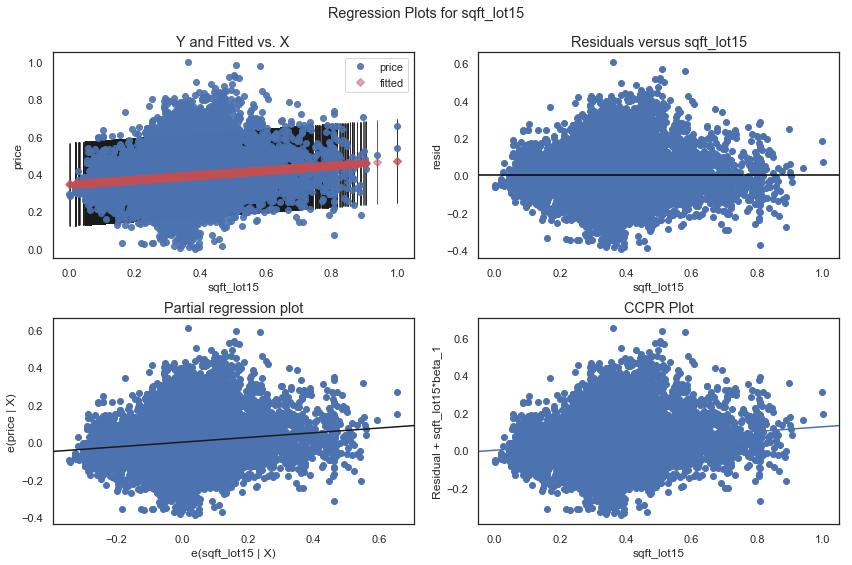

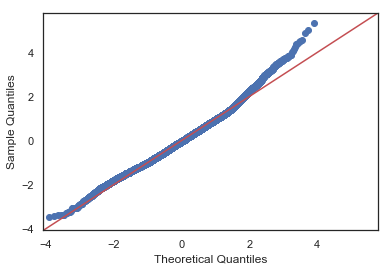

Regression diagnostics for price~waterfront_yes


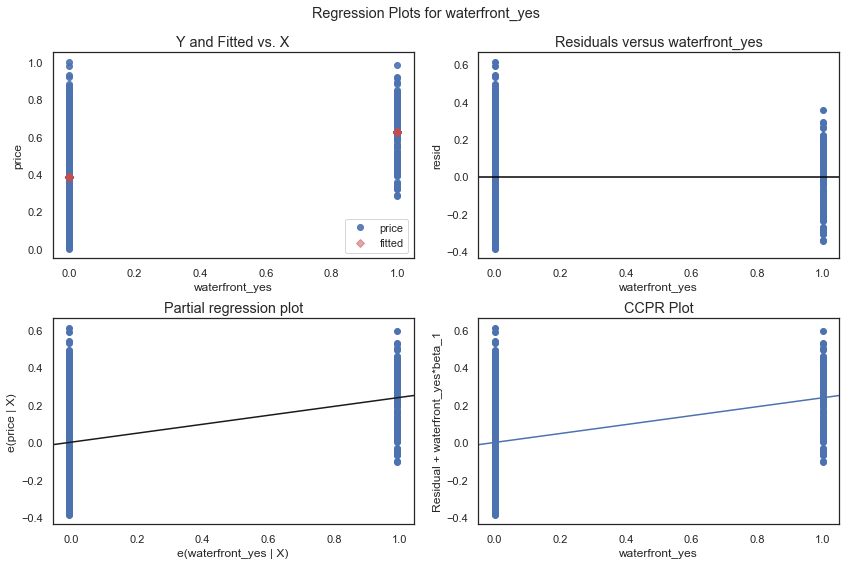

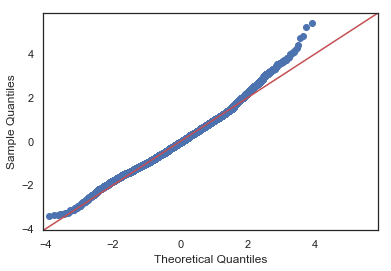

In [56]:
results = [['independent_variable', 'r_squared', 'intercept', 'slope', 'p-value', 'normality(JB)']]

for i, col in enumerate(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'waterfront_yes']):

    #Creating the OLS regression model 
    f = 'price~' + col
    model = ols(formula=f, data=kc_log).fit()
    print('Regression diagnostics for ' + f)
    
    # Plotting the residuals
    fig = plt.figure(figsize=(12,8))
    sm.graphics.plot_regress_exog(model, col, fig=fig)
    plt.show()

    # Q-Q plot
    sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
    plt.show()
    
    # Add results from each iteration as a new list in results, so that it can be turned into a pandas dataframe with
    # the first row as the column names
    results.append([col, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0]])

In [57]:
results = pd.DataFrame(results)
results.columns = results.iloc[0]
results = results.drop(results.index[0])
results.sort_values(by=['normality(JB)'])

,independent_variable,r_squared,intercept,slope,p-value,normality(JB)
3,sqft_living,0.455357,0.0897912,0.656631,0,114.096
9,sqft_above,0.343411,0.155348,0.509055,0,139.438
8,grade,0.48141,-0.104773,0.781118,0,216.383
2,bathrooms,0.27069,0.180072,0.421423,0,344.181
6,view,0.118786,0.376373,0.20672,0,436.57
14,sqft_living15,0.368636,0.0587929,0.583556,0,474.501
1,bedrooms,0.117748,0.224531,0.333699,0,683.216
10,sqft_basement,0.0980436,0.365101,0.393458,0,691.265
16,waterfront_yes,0.0291453,0.386809,0.238882,6.30341e-141,701.596
4,sqft_lot,0.019116,0.340342,0.141704,1.21474e-92,761.236


#### Linearity assumption and heteroscedasticity

This will be tested with sns jointplots.

The scatterplots below confirm that there is a lot of variation in the data, and that no one variable is a solid predictor of house price. Some variables exhibit a degree of heteroscedasticity, e.g. longitude, but most appear sufficiently homoscedastic to use in linear regression.

C:\Users\Laura\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


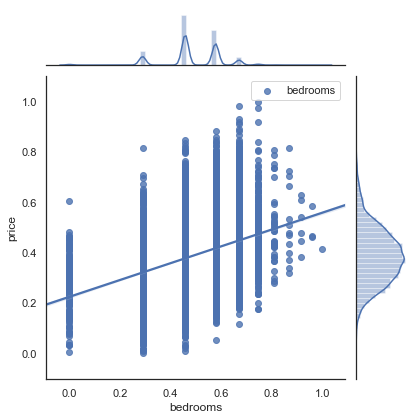

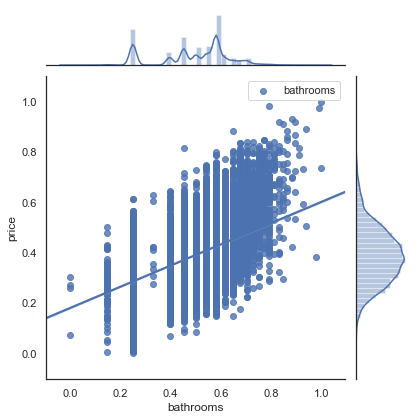

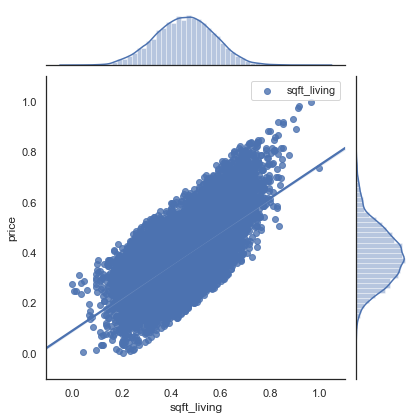

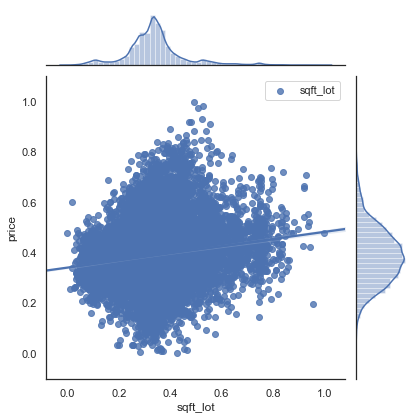

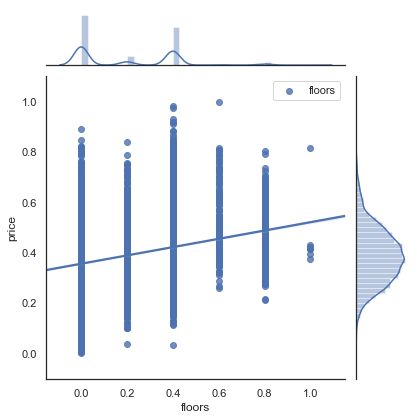

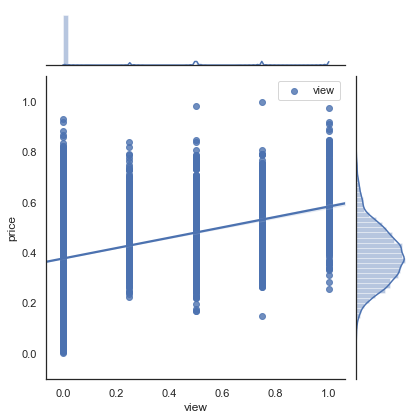

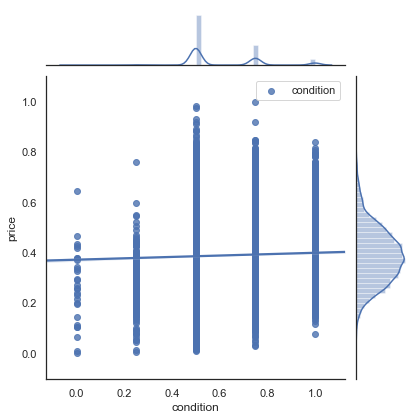

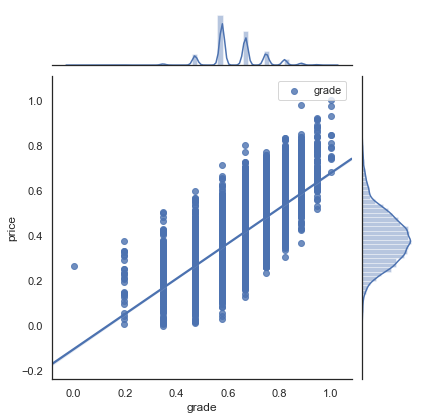

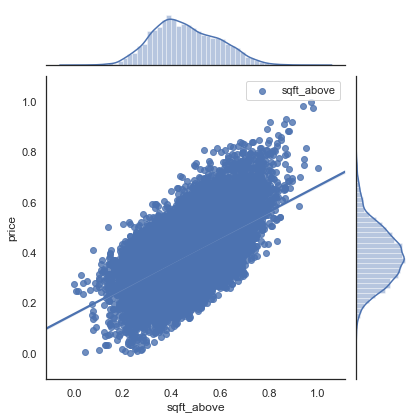

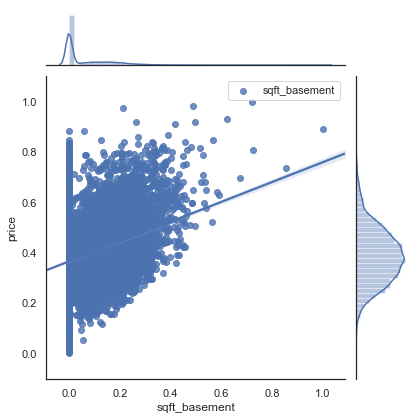

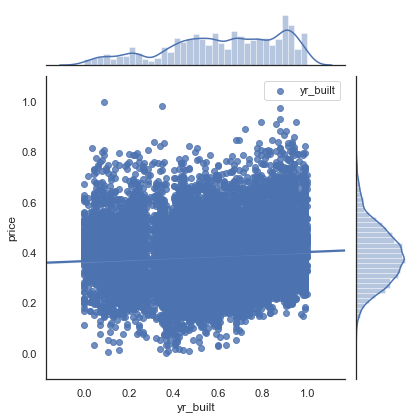

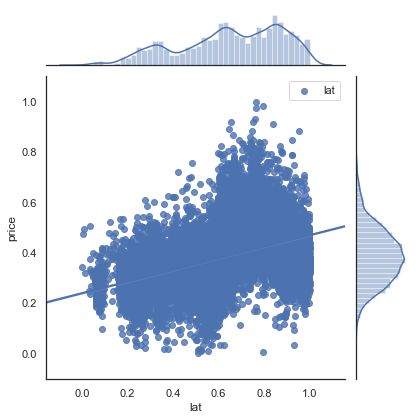

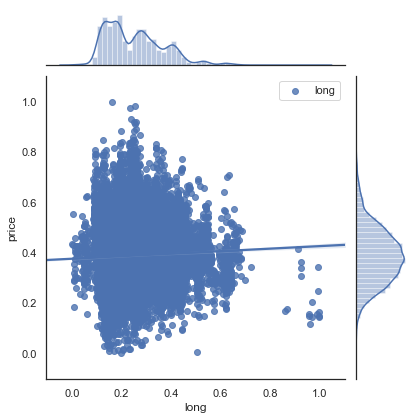

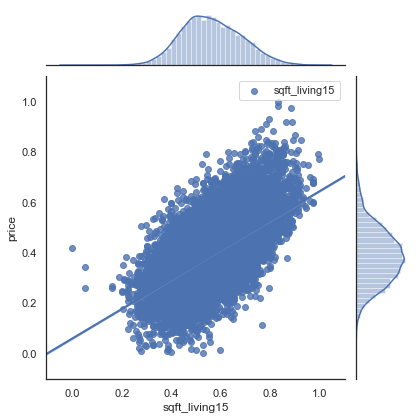

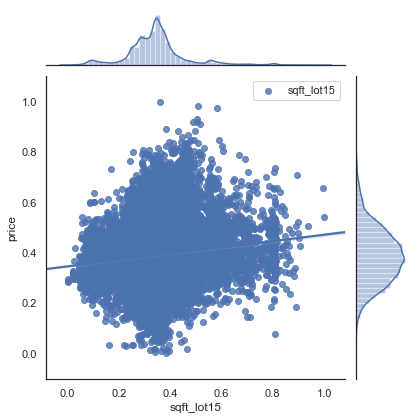

In [58]:
for col in ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']:
    sns.jointplot(x= kc_log[col], y= kc_log['price'], data=kc_log, kind='reg', label=col)
    plt.legend()
    plt.show();

***
# Questions

Exploratory data analysis of the dataset brings up some interesting questions that can be explored further. Three questions will be addressed in the following section:
- How much does house price vary by location? Specifically, what is the proportional difference in price per square foot between the cheapest and the most expensive area?
- How much does having a view increase house price by?
- How have house prices changed over time?

### Question 1: how much does house price vary by location?

It is generally known that location is a very important factor in house price. The over-arching question of how much house price varies by location will be answered specifically in the form of: what is the proportional difference in price per square foot between the cheapest and the most expensive area?

A 2-dimensional histogram with longitude on the x axis and latitude on the y axis can be used to produce a map of where exactly in King County the properties area. This figure shows that a lot of properties are found in and around Seattle, but that the dataset also includes properties further away from the city. Lot size is likely to vary in a non-random way, with smaller lots in the city and larger lots in the country. Therefore, a better metric to compare like-for-like may be to compare price per square foot (ppsf).

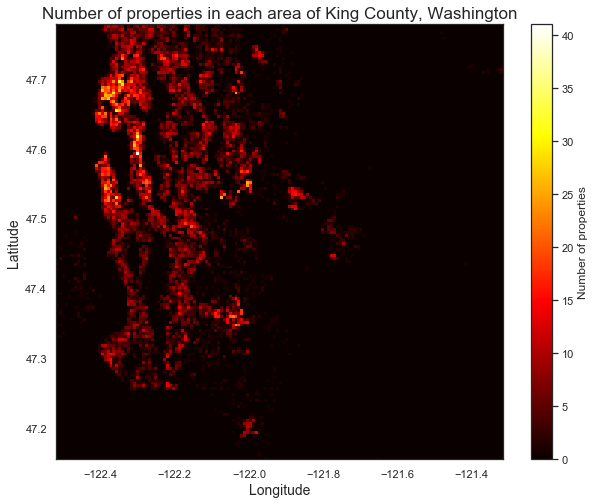

In [59]:
# Plotting a 2D histogram
plt.figure(figsize = (10,8))
plt.hist2d(kc.long, kc.lat, bins=150, cmap='hot')
plt.colorbar().set_label('Number of properties')
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.title('Number of properties in each area of King County, Washington', fontsize=17)
plt.show()

Price per square foot will be calculated by dividing price by sqft_living (i.e. the square footage of the house):

In [60]:
kc['price_per_sqft'] = kc.price/kc.sqft_living

The descriptive statistics and histogram below show that the median ppsf is $\$$245. However, the distribution has a long right tail, with some much more expensive properties having a ppsf of up to $\$$810.

In [61]:
kc.price_per_sqft.describe()

count    21597.000000
mean       264.143368
std        110.000061
min         87.588235
25%        182.291667
50%        244.644550
75%        318.333333
max        810.138889
Name: price_per_sqft, dtype: float64

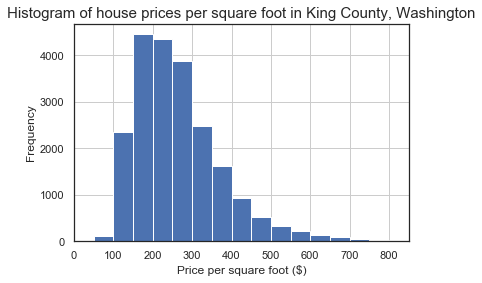

In [62]:
kc.price_per_sqft.hist(bins=range(0, 851, 50))
plt.xlabel('Price per square foot ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram of house prices per square foot in King County, Washington', fontsize=15)
plt.xlim(0,850)
plt.show()

The figure below uses longitude and latitude as the x and y axes, respectively, to plot a scatter graph of ppsf to show their geographical distribution. It demonstrates that the highest ppsf are found in Bellevue, and the lowest are generally found outside of Seattle to the south.

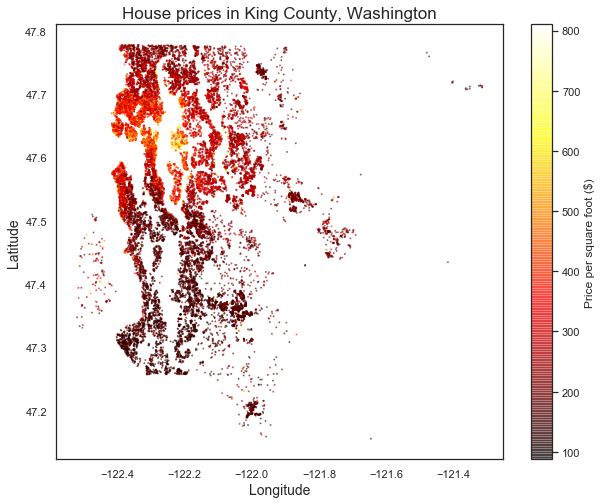

In [63]:
plt.figure(figsize = (10,8))
plt.scatter(kc.long, kc.lat ,c=kc.price_per_sqft, cmap = 'hot', s=1, alpha=0.5)
plt.colorbar().set_label('Price per square foot ($)')
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.title('House prices in King County, Washington', fontsize=17)
plt.show()

In order to calculate the proportional difference in ppsf between the cheapest and the most expensive area, zipcodes will be used to group properties by location. The graph below plots mean ppsf by zipcode.

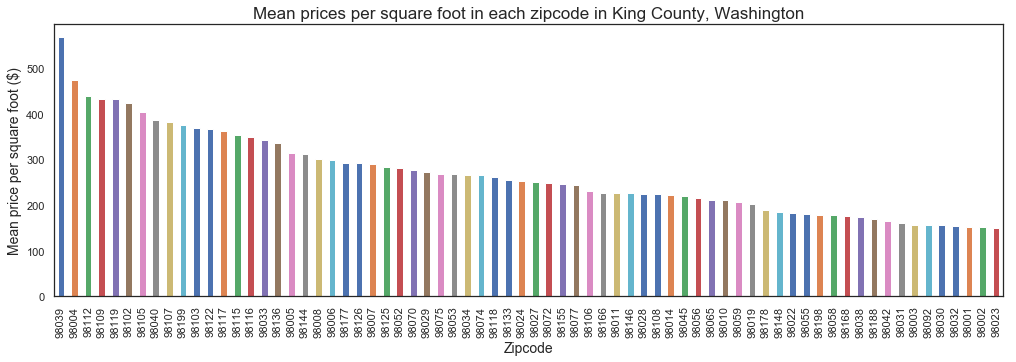

In [64]:
# Mean price per square foot for each zipcode
zip_ppsf = kc.groupby(['zipcode'])['price_per_sqft'].mean().sort_values(ascending=False)
zip_ppsf.plot(kind='bar', figsize=(17,5))
plt.xlabel('Zipcode', fontsize=14)
plt.ylabel('Mean price per square foot ($)', fontsize=14)
plt.title('Mean prices per square foot in each zipcode in King County, Washington', fontsize=17)
plt.show()

The graph above shows that the most expensive zipcode is 98039 (Medina, home of tech billionaires), and the cheapest is 98023 (Federal Way). The proportional difference between the average ppsf in these two zipcodes is calculated below. **The price per square foot in Medina is 3.8 times that in Federal Way.**

In [65]:
1+(zip_ppsf.max() - zip_ppsf.min())/zip_ppsf.min() # Calculating the increase from the cheapest to the most expensive

3.815712728126332

### Question 2: how much does having a view increase house price by?

The table and histogram below show the mean ppsf for different view ratings.

In [66]:
kc.view.value_counts()

0    19485
2      957
3      508
1      330
4      317
Name: view, dtype: int64

In [67]:
kc.groupby(['view'])['price_per_sqft'].mean()

view
0    256.910529
1    320.076130
2    304.420288
3    323.027575
4    434.540453
Name: price_per_sqft, dtype: float64

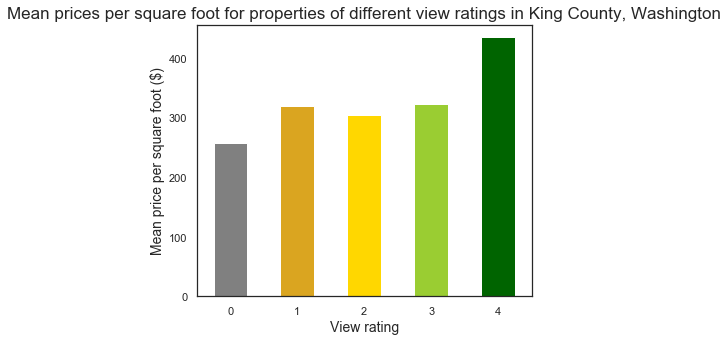

In [68]:
# Mean price per square foot for each view rating
kc.groupby(['view'])['price_per_sqft'].mean().plot(kind='bar', figsize=(6,5), color=['grey', 'goldenrod', 'gold', 'yellowgreen', 'darkgreen'])
plt.xlabel('View rating', fontsize=14)
plt.xticks(rotation='horizontal')
plt.ylabel('Mean price per square foot ($)', fontsize=14)
plt.title('Mean prices per square foot for properties of different view ratings in King County, Washington', fontsize=17)
plt.show()

The analysis above shows that there is a considerable increase (25%) in mean ppsf from properties with 0 view (mean ppsf $\$$257) to a view rating of 1 (mean ppsf $\$$320). There is also a considerable increase (35%) from properties with a view rating of 3 ($\$$323) to a view rating of 4 ($\$$435). However, properties with view ratings of 1-3 achieve similar ppsft (between $\$$304 and $\$$323). There is even a slight dip from a view rating of 1 to 2. This could be caused by multiple other factors which influence house price. For example, it might be that a lot of properties with a rating of 2 are in a more urban area with smaller house sizes. Overall, the results indicate that **there is a big difference between having no view and having some view, and between having a good view and having the best view, but that otherwise there is not much payoff in terms of increasing house prices by having different values or types of good view.**

### Question 3: how have house prices changed over time?

The table below shows the

In [341]:
# Creating a series of months and years in the correct calendar order
ordered_months = pd.DataFrame((sorted(list(monthly_prices['date']), key = lambda x: datetime.strptime(x, '%B %Y')))) 
ordered_months.rename(columns={0:'date'}, inplace=True)

# Creating a dataframe of the average house price per month
monthly_prices = pd.DataFrame((kc.groupby(kc['date'].dt.strftime('%B %Y'))['price'].mean()))
monthly_prices = monthly_prices.reset_index()

# Combining dataframes so that prices are associated with months in the correct order
ordered_monthly_prices = pd.concat([ordered_months.set_index('date'),monthly_prices.set_index('date')], axis=1, join='inner').reset_index()
ordered_monthly_prices

,date,price
0,May 2014,548166.600113
1,June 2014,557534.318182
2,July 2014,544892.161013
3,August 2014,536655.212481
4,September 2014,529723.517787
5,October 2014,539439.447228
6,November 2014,522359.903478
7,December 2014,524799.902041
8,January 2015,525963.251534
9,February 2015,508520.051323


In [261]:
print("Lowest average monthly price:", min(monthly_prices))
print("Highest average monthly price:", max(monthly_prices))
print(f"Increase from lowest to highest average monthly price: {round(100*(max(monthly_prices)-min(monthly_prices))/min(monthly_prices),1)}%")

Lowest average monthly price: 508520.0513231756
Highest average monthly price: 562215.6150740242
Increase from lowest to highest average monthly price: 10.6%


TypeError: unhashable type: 'numpy.ndarray'

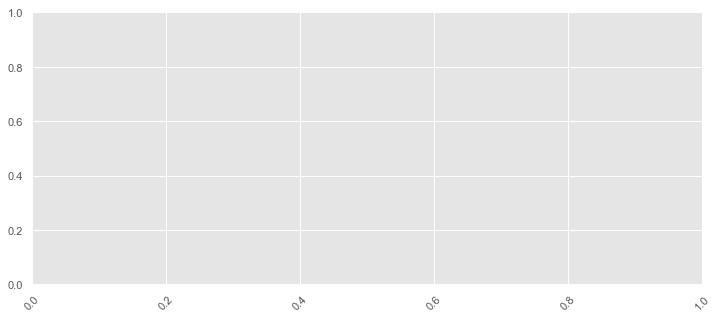

In [324]:
plt.figure(figsize=(12,5))
plt.xticks(rotation=45)
plt.plot(monthly_prices)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average house price ($)', fontsize=14)
plt.title('Change in average house price in King County, Washington, May 2014 - May 2015', fontsize=16)
plt.show()

***
# Modeling the data

This section will use simple and multiple linear regression to attempt to use the dataset to predice house prices. First, linear regression is conducted for each variable. Then multiple regression using a feature selection algorithm will be used. Test-train splits will be used to assess the prediction ability of the resulting model/s.

### Simple linear regression

In the 'Exploring the data' section above, when testing the normality assumption, a table of model parameters was produced for the results of simple linear regression analysis run between each variable and the target variable of price:

In [74]:
results

,independent_variable,r_squared,intercept,slope,p-value,normality(JB)
1,bedrooms,0.117748,0.224531,0.333699,0,683.216
2,bathrooms,0.27069,0.180072,0.421423,0,344.181
3,sqft_living,0.455357,0.0897912,0.656631,0,114.096
4,sqft_lot,0.019116,0.340342,0.141704,1.21474e-92,761.236
5,floors,0.096491,0.355815,0.164991,0,1031.28
6,view,0.118786,0.376373,0.20672,0,436.57
7,condition,0.00151463,0.371894,0.027438,1.05756e-08,1086.24
8,grade,0.48141,-0.104773,0.781118,0,216.383
9,sqft_above,0.343411,0.155348,0.509055,0,139.438
10,sqft_basement,0.0980436,0.365101,0.393458,0,691.265


All variables have a positive correlation with price, i.e. increasing them increases price. All variables have a p value <0.05, and so none will be dropped for now.

The top 5 variables with the highest predictive power (i.e. highest r-squared values) when considered individually are grade, sqft_living, sqft_living15, sqft_above and bathrooms (below). I.e. the construction quality, house size total/above ground, house size of neighbouring houses, and number of bathrooms are the best individual predictors of house price. However, when taken alone, no single variable can explain more than 50% of the variation in price. The scatterplots below for each of the variables show the regression lines and confirm these findings.

In [75]:
results.sort_values(by=['r_squared'], ascending=False) # Results sorted by highest r squared values

,independent_variable,r_squared,intercept,slope,p-value,normality(JB)
8,grade,0.48141,-0.104773,0.781118,0,216.383
3,sqft_living,0.455357,0.0897912,0.656631,0,114.096
14,sqft_living15,0.368636,0.0587929,0.583556,0,474.501
9,sqft_above,0.343411,0.155348,0.509055,0,139.438
2,bathrooms,0.27069,0.180072,0.421423,0,344.181
12,lat,0.201455,0.238289,0.230927,0,2761.33
6,view,0.118786,0.376373,0.20672,0,436.57
1,bedrooms,0.117748,0.224531,0.333699,0,683.216
10,sqft_basement,0.0980436,0.365101,0.393458,0,691.265
5,floors,0.096491,0.355815,0.164991,0,1031.28


# COME BACK TO THE TWO CODE SECTIONS BELOW TO FIX MATRIC SCATTERPLOT/MAKE MORE EFFICIENT

In [76]:
#fig, ax = plt.subplots(2,2)
#ax1, ax2, ax3, ax4 = ax.flatten()
#for n, col in enumerate(['sqft_living', 'sqft_living15', 'grade', 'bathrooms']):
#    axis = "ax" + str(n+1)
#    sns.regplot(kc_log[col], kc_log['price'], label=col, marker = '.', scatter_kws={'s':1}, ax=axis)
#    plt.legend()
#    plt.show()

C:\Users\Laura\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


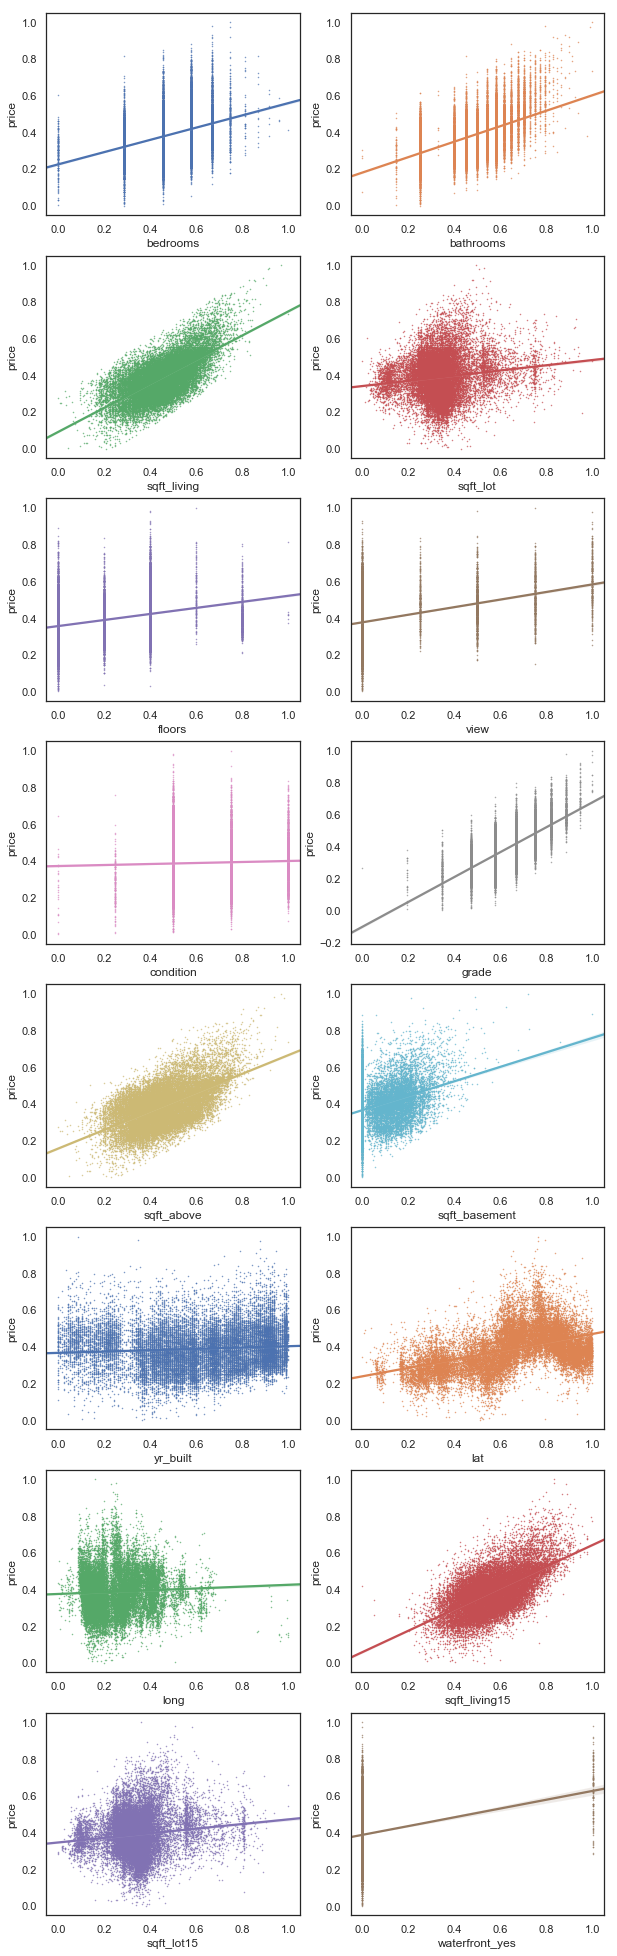

In [77]:
fig, ax = plt.subplots(8,2, figsize=(10,35))
ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16 = ax.flatten()
sns.regplot(kc_log['bedrooms'], kc_log['price'], marker = '.', scatter_kws={'s':1}, ax=ax1)
sns.regplot(kc_log['bathrooms'], kc_log['price'], marker = '.', scatter_kws={'s':1}, ax=ax2)
sns.regplot(kc_log['sqft_living'], kc_log['price'], marker = '.', scatter_kws={'s':1}, ax=ax3)
sns.regplot(kc_log['sqft_lot'], kc_log['price'], marker = '.', scatter_kws={'s':1}, ax=ax4)
sns.regplot(kc_log['floors'], kc_log['price'], marker = '.', scatter_kws={'s':1}, ax=ax5)
sns.regplot(kc_log['view'], kc_log['price'], marker = '.', scatter_kws={'s':1}, ax=ax6)
sns.regplot(kc_log['condition'], kc_log['price'], marker = '.', scatter_kws={'s':1}, ax=ax7)
sns.regplot(kc_log['grade'], kc_log['price'], marker = '.', scatter_kws={'s':1}, ax=ax8)
sns.regplot(kc_log['sqft_above'], kc_log['price'], marker = '.', scatter_kws={'s':1}, ax=ax9)
sns.regplot(kc_log['sqft_basement'], kc_log['price'], marker = '.', scatter_kws={'s':1}, ax=ax10)
sns.regplot(kc_log['yr_built'], kc_log['price'], marker = '.', scatter_kws={'s':1}, ax=ax11)
sns.regplot(kc_log['lat'], kc_log['price'], marker = '.', scatter_kws={'s':1}, ax=ax12)
sns.regplot(kc_log['long'], kc_log['price'], marker = '.', scatter_kws={'s':1}, ax=ax13)
sns.regplot(kc_log['sqft_living15'], kc_log['price'], marker = '.', scatter_kws={'s':1}, ax=ax14)
sns.regplot(kc_log['sqft_lot15'], kc_log['price'], marker = '.', scatter_kws={'s':1}, ax=ax15)
sns.regplot(kc_log['waterfront_yes'], kc_log['price'], marker = '.', scatter_kws={'s':1}, ax=ax16);

### Multiple linear regression

#### Without zipcodes

Using linear regression with a single predictor variable, the highest r squared value achieved was grade with 0.48141, i.e. the construction quality of the building can be used to predict 48% of the price. This is not a very good predictive model. To improve the model, multiple linear regression will be used, to use more than one predictive variable at a time.

Scikit-Learn's feature ranking with recursive feature elimination function will be used in order to select the features to be included in the final model. As a first version of the model, 5 variables will be selected, to see how they compare to the top 5 variables with the highest r squared values in simple linear regression:

In [78]:
X = kc_log.drop(['waterfront_no', 'price'], axis=1) # Dropping one of the waterfront category columns
y = kc_log['price']

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 5)
selector = selector.fit(X, y)

selected_columns = list(X.columns[selector.support_])
linreg.fit(X[selected_columns],y)
yhat = linreg.predict(X[selected_columns])
SS_Residual = np.sum((y-yhat)**2)
SS_Total = np.sum((y-np.mean(y))**2)
rsquared = 1 - (float(SS_Residual))/SS_Total
adj_rsquared = 1 - (1-rsquared)*(len(y)-1)/(len(y)-X.shape[1]-1)

print("Selected columns:", selected_columns)
print("R squared:", rsquared)
print("Adjusted r squared:", adj_rsquared)

Selected columns: ['grade', 'sqft_above', 'sqft_basement', 'lat', 'waterfront_yes']
R squared: 0.7066664929457278
Adjusted r squared: 0.7064490074910073


Interestingly, the five features chosen via scikit-learn's recursive feature elimination are slightly different to the five variables that produced the highest r squared values when considered individually in simple linear regression: both models contain grade and sqft_above, but the multiple linear regression model uses sqft_basement, lat and waterfront_yes (i.e. being by the waterfront), rather than sqft_living, sqft_living15 and bathrooms. This may be because sqft_living and sqft_above are often similar (as sqft_living is usually equal to sqft_above plus sqft_basement), and sqft_living and sqft_living15 are somewhat correlated (as houses in a neighbourhood are likely to be similar in size), so it is not necessary to include all of these when they are all being used. Instead, the multiple regression model includes two new separate features - location (through the feature 'latitude') and whether a property is on the waterfront.

This new model has an adjusted r squared (to take account of the use of multiple features) of 0.706, i.e. it explains 70.6% of variation in house prices. This is much better than the best linear regression model using only a single feature.

Next, a for loop will be used to assess the predictive power of models built using different numbers of predictor variables.

In [79]:
X = kc_log.drop(['waterfront_no', 'price'], axis=1) # Dropping one of the waterfront category columns
y = kc_log['price']

rfe_results = [['num_features', 'r_squared', 'adjusted_r_squared']]

for n in range(2, 17, 1):
    linreg = LinearRegression()
    selector = RFE(linreg, n_features_to_select = n)
    selector = selector.fit(X, y)
    selected_columns = list(X.columns[selector.support_])
    linreg.fit(X[selected_columns],y)
    yhat = linreg.predict(X[selected_columns])
    SS_Residual = np.sum((y-yhat)**2)
    SS_Total = np.sum((y-np.mean(y))**2)
    rsquared = 1 - (float(SS_Residual))/SS_Total
    adj_rsquared = 1 - (1-rsquared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    rfe_results.append([n, rsquared, adj_rsquared])

rfe_results = pd.DataFrame(rfe_results)
rfe_results.columns = rfe_results.iloc[0]
rfe_results = rfe_results.drop(rfe_results.index[0])
rfe_results

,num_features,r_squared,adjusted_r_squared
1,2,0.521665,0.52131
2,3,0.549579,0.549245
3,4,0.694415,0.694188
4,5,0.706666,0.706449
5,6,0.714143,0.713931
6,7,0.74494,0.744751
7,8,0.748904,0.748717
8,9,0.748916,0.748729
9,10,0.756434,0.756253
10,11,0.758378,0.758199


From the table above, it can be seen that the adjusted r squared value for each model increases for the first few additional features that are added, and then starts to plateau after about 6 features. The highest r squared value is for a model with all 16 features, which explains 76.5% of variation in house prices.

However, with this many features it is possible that the model is overfitting to the data that is being run on. The next step is therefore to re-run the model generation with a train-test split, to see how the model performs when predicting house prices from data that was not used to build it. A train-test split of 80-20 will be used.

In the table below, the root mean squared error is reported. This allows for the comparison of the size of the residuals in the test set versus the training set. The results show that the MSEs for the training and the test set are small, and also very similar so the model is likely not overfitting.

In [80]:
X = kc_log.drop(['waterfront_no', 'price'], axis=1)
y = kc_log['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
mse_results = [['num_features', 'train_mse', 'test_mse']]

for n in range(2, 17, 1):
    selector = RFE(linreg, n_features_to_select = n)
    selector = selector.fit(X_train, y_train)
    selected_columns = X_train.columns[selector.support_]
    linreg.fit(X_train[selected_columns], y_train)
    y_hat_train = linreg.predict(X_train[selected_columns])
    y_hat_test = linreg.predict(X_test[selected_columns])
    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)
    mse_results.append([n, train_mse, test_mse])

mse_results = pd.DataFrame(mse_results)
mse_results.columns = mse_results.iloc[0]
mse_results = mse_results.drop(mse_results.index[0])
mse_results

,num_features,train_mse,test_mse
1,2,0.00625499,0.00642428
2,3,0.00589714,0.00602042
3,4,0.00400669,0.00406201
4,5,0.00386162,0.00383731
5,6,0.00375187,0.00378687
6,7,0.00335456,0.00335099
7,8,0.00329969,0.00330999
8,9,0.00326794,0.0032785
9,10,0.0032661,0.0032736
10,11,0.00317905,0.00316944


However, because the 80-20 split of the data is random, the results differ slightly each time the model is re-run using the split. K-fold cross-validation can be used to split the data into multiple sections, and use each section once as the test set while using the others as the training set. The individual results can then be averaged in order to get a cross-validation MSE, which reduces the impact of split results that are particularly higher or lower than average.

Below are the MSE results from 10-fold cross-validation using the model containing all 16 variables considered above. There is little variation between the MSE scores in each iteration, which shows that the model is robust.

In [113]:
X = kc_log.drop(['waterfront_no', 'price'], axis=1)
y = kc_log['price']

cv10_scores = cross_val_score(linreg, X, y, cv=10, scoring="neg_mean_squared_error")
print("MSE values:", cv10_scores)
print("Average:", np.mean(cv10_scores))

MSE values: [-0.003048   -0.00332445 -0.00308192 -0.00318566 -0.00293214 -0.00316092
 -0.00302527 -0.00320628 -0.00319691 -0.00301538]
Average: -0.003117694092636204


#### Adding zipcodes back in for the final model

As discussed above, zipcodes were temporarily dropped in favour of using latitude and longitude. They will now be added back in and one-hot encoded as categories, and then included in a new version of the model to see if it improves its predictive abilities.

In [82]:
zipcode_dummies = pd.get_dummies(kc['zipcode'], prefix='zip')
kc_log_zip = pd.concat([kc_log, zipcode_dummies], axis=1)
kc_log_zip.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,waterfront_no,waterfront_yes,zip_98001,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,zip_98032,zip_98033,zip_98034,zip_98038,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,0.227669,0.458157,0.250000,0.322166,0.295858,0.0,0.0,0.5,0.577833,0.358392,0.000000,0.478261,0.571498,0.217608,0.441342,0.300162,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.420522,0.458157,0.542481,0.538392,0.326644,0.4,0.0,0.5,0.577833,0.546652,0.082988,0.443478,0.908959,0.166113,0.525882,0.342058,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.182099,0.289065,0.250000,0.203585,0.366664,0.0,0.0,0.5,0.472707,0.226478,0.000000,0.286957,0.936143,0.237542,0.699256,0.349544,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.445720,0.578130,0.646241,0.463123,0.280700,0.0,0.0,1.0,0.577833,0.322322,0.188797,0.565217,0.586939,0.104651,0.446739,0.283185,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0.408883,0.458157,0.500000,0.420302,0.340224,0.0,0.0,0.5,0.668898,0.467563,0.000000,0.756522,0.741354,0.393688,0.548854,0.339562,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


The table and graph below show that the predictive power of the model increases considerably as more features are added, up to about 5 features. The impact of adding new features then increases more slowly up to about 40 features, where it starts to level off. It plateaus after about 60 features. The highest r squared value achieved is 0.881, i.e. explaining 88.1% of variation in house prices.

In [83]:
len(kc_log_zip.columns) # Number of columns in new dataframe including zipcodes

88

In [84]:
X = kc_log_zip.drop(['price', 'waterfront_no', 'zip_98001'], axis=1) # Dropping one of the waterfront and zipcode category columns
y = kc_log_zip['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

zip_results = [['num_features', 'r_squared', 'adjusted_r_squared', 'train_mse', 'test_mse']]

for n in range(2, ((len(kc_log_zip.columns))+1), 1):
    linreg = LinearRegression()
    selector = RFE(linreg, n_features_to_select = n)
    selector = selector.fit(X, y)
    selected_columns = list(X.columns[selector.support_])
    linreg.fit(X[selected_columns],y)
    yhat = linreg.predict(X[selected_columns])
    SS_Residual = np.sum((y-yhat)**2)
    SS_Total = np.sum((y-np.mean(y))**2)
    rsquared = 1 - (float(SS_Residual))/SS_Total
    adj_rsquared = 1 - (1-rsquared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    y_hat_train = linreg.predict(X_train[selected_columns])
    y_hat_test = linreg.predict(X_test[selected_columns])
    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)    
    zip_results.append([n, rsquared, adj_rsquared, train_mse, test_mse])

zip_results = pd.DataFrame(zip_results)
zip_results.columns = zip_results.iloc[0]
zip_results = zip_results.drop(zip_results.index[0])
zip_results

,num_features,r_squared,adjusted_r_squared,train_mse,test_mse
1,2,0.537632,0.535805,0.00605336,0.00617931
2,3,0.688918,0.687689,0.00406947,0.00417046
3,4,0.703002,0.701828,0.00389594,0.0039388
4,5,0.707836,0.706682,0.00382314,0.0039122
5,6,0.725702,0.724618,0.00359702,0.00364232
6,7,0.735671,0.734627,0.00346282,0.00352381
7,8,0.745091,0.744084,0.00334302,0.00338384
8,9,0.763017,0.762081,0.00310392,0.00316185
9,10,0.765656,0.76473,0.00307203,0.00311599
10,11,0.767914,0.766997,0.00304297,0.00308379


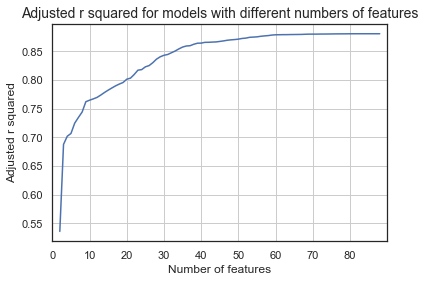

In [85]:
plt.plot(zip_results.num_features, zip_results.adjusted_r_squared)
plt.xlabel('Number of features', fontsize=12)
plt.ylabel('Adjusted r squared', fontsize=12)
plt.title('Adjusted r squared for models with different numbers of features', fontsize=14)
plt.xticks(np.arange(0, 90, step=10))
plt.xlim(0,90)
plt.grid();

One way to select the features for the final model is by using an alternative form of feature selection - stepwise selection with p-values. Whereas feature ranking with recursive feature elimination requires you to specify the number of features for selection (in the case above, models with everything from 2 to 88 features were attempted), stepwise selection keeps adding features based on p-values until no more features can be added or removed based on set p-value thresholds. The box below defines a stepwise selection function.

In [86]:
# This function is copied from: https://datascience.stackexchange.com/questions/937/does-scikit-learn-have-forward-selection-stepwise-regression-algorithm
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

The stepwise selection function is then run using the transformed King County dataset including zipcodes. It results in a model including 74 features.

In [89]:
X = kc_log_zip.drop(['price', 'waterfront_no', 'zip_98001'], axis=1)
y = kc_log_zip['price']

final_features = stepwise_selection(X, y)

Add  bedrooms                       with p-value 0.0
Add  sqft_living15                  with p-value 0.0
Add  grade                          with p-value 0.0
Add  sqft_basement                  with p-value 0.0
Drop bedrooms                       with p-value 0.244811


C:\Users\Laura\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:43: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


Add  yr_built                       with p-value 0.0
Add  lat                            with p-value 0.0
Add  sqft_above                     with p-value 0.0
Add  view                           with p-value 4.01616e-243
Add  zip_98004                      with p-value 4.88385e-274
Add  zip_98155                      with p-value 5.22068e-138
Add  zip_98040                      with p-value 1.83327e-127
Add  zip_98133                      with p-value 2.4237e-129
Add  zip_98028                      with p-value 1.27024e-129
Add  zip_98112                      with p-value 5.0507e-113
Add  zip_98019                      with p-value 1.24181e-101
Add  zip_98039                      with p-value 1.21505e-101
Add  zip_98011                      with p-value 8.28433e-94
Add  zip_98072                      with p-value 1.80095e-98
Add  zip_98034                      with p-value 1.69695e-110
Add  waterfront_yes                 with p-value 9.36949e-104
Add  condition                      wit

In [90]:
len(final_features)

74

In [91]:
final_features

['sqft_living15',
 'grade',
 'sqft_basement',
 'yr_built',
 'lat',
 'sqft_above',
 'view',
 'zip_98004',
 'zip_98155',
 'zip_98040',
 'zip_98133',
 'zip_98028',
 'zip_98112',
 'zip_98019',
 'zip_98039',
 'zip_98011',
 'zip_98072',
 'zip_98034',
 'waterfront_yes',
 'condition',
 'zip_98077',
 'zip_98125',
 'zip_98177',
 'zip_98022',
 'zip_98168',
 'zip_98178',
 'zip_98014',
 'zip_98053',
 'sqft_lot',
 'zip_98116',
 'zip_98136',
 'zip_98119',
 'bathrooms',
 'zip_98109',
 'zip_98122',
 'zip_98102',
 'zip_98010',
 'zip_98055',
 'zip_98058',
 'zip_98105',
 'zip_98199',
 'zip_98006',
 'sqft_living',
 'bedrooms',
 'zip_98144',
 'zip_98188',
 'zip_98031',
 'zip_98056',
 'zip_98146',
 'zip_98198',
 'zip_98032',
 'zip_98029',
 'zip_98038',
 'zip_98027',
 'zip_98107',
 'zip_98126',
 'zip_98103',
 'zip_98005',
 'zip_98030',
 'zip_98023',
 'zip_98042',
 'zip_98148',
 'zip_98115',
 'zip_98117',
 'zip_98033',
 'zip_98008',
 'zip_98118',
 'zip_98007',
 'zip_98075',
 'zip_98003',
 'sqft_lot15',
 'zip_9

A final model can then be built, using these 74 features. The results summary below shows that the adjusted r squared for this model is 0.879, and that it does not include any predictors with p-values greater than 0.05.

In [130]:
# Final model
predictors = sm.add_constant(kc_log_zip[final_features])
final_model = sm.OLS(y,predictors).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     2123.
Date:                Thu, 07 Feb 2019   Prob (F-statistic):               0.00
Time:                        15:42:31   Log-Likelihood:                 38981.
No. Observations:               21597   AIC:                        -7.781e+04
Df Residuals:                   21522   BIC:                        -7.721e+04
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1705      0.003    -50.905      0.000      -0.177      -0.164
sqft_living15      0.0936      0.004     23.623      0.000       0.086       0.101
grade              0.2242      0.005     45.044      0.000       0.214       0.234
sqft_basement      0.0323      0.008      4.107      0.000       0.017       0.048
yr_built          -0.0103      0.002     -5.752      0.000      -0.014      -0.007
lat                0.2148      0.003     70.039      0.000       0.209       0.221
sqft_above         0.1522      0.010     14.964      0.000       0.132       0.172
view               0.0560      0.002     32.534      0.000       0.053       0.059
zip_98004          0.1333      0.002     54.828      0.000       0.129       0.138
zip_98155         -0.0655      0.002    -27.457      0.000      -0.070      -0.061
zip_98040          0.0984      0.003     38.727      0.000       0.093       0.103
zip_98133         -0.0497      0.002    -21.898      0.000      -0.054      -0.045
zip_98028         -0.0730      0.003    -26.445      0.000      -0.078      -0.068
zip_98112          0.1175      0.003     42.928      0.000       0.112       0.123
zip_98019         -0.0883      0.003    -27.457      0.000      -0.095      -0.082
zip_98039          0.1737      0.006     30.276      0.000       0.162       0.185
zip_98011         -0.0665      0.003    -20.887      0.000      -0.073      -0.060
zip_98072         -0.0592      0.003    -21.107      0.000      -0.065      -0.054
zip_98034         -0.0313      0.002    -14.645      0.000      -0.035      -0.027
waterfront_yes     0.1082      0.004     29.698      0.000       0.101       0.115
condition          0.0420      0.002     22.320      0.000       0.038       0.046
zip_98077         -0.0656      0.003    -20.425      0.000      -0.072      -0.059
zip_98125         -0.0207      0.002     -8.758      0.000      -0.025      -0.016
zip_98177         -0.0277      0.003     -9.652      0.000      -0.033      -0.022
zip_98022          0.0342      0.003     11.173      0.000       0.028       0.040
zip_98168         -0.0475      0.003    -18.534      0.000      -0.053      -0.043
zip_98178         -0.0355      0.003    -13.667      0.000      -0.041      -0.030
zip_98014         -0.0673      0.004    -17.604      0.000      -0.075      -0.060
zip_98053         -0.0103      0.002     -4.484      0.000      -0.015      -0.006
sqft_lot           0.1256      0.006     19.444      0.000       0.113       0.138
zip_98116          0.0751      0.002     31.049      0.000       0.070       0.080
zip_98136          0.0700      0.003     26.636      0.000       0.065       0.075
zip_98119          0.0999      0.003     31.110      0.000       0.094       0.106
bathrooms          0.0383      0.004     10.840      0.000       0.031       0.045
zip_98109   

A train-test split is applied to the final model below. The test and train MSEs are very similar, so there does not appear to be much of a risk of over-fitting.

In [96]:
X = kc_log_zip[final_features]
y = kc_log_zip['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
selector = RFE(linreg, n_features_to_select = n)
selector = selector.fit(X_train, y_train)
selected_columns = X_train.columns[selector.support_]
linreg.fit(X_train[selected_columns], y_train)
y_hat_train = linreg.predict(X_train[selected_columns])
y_hat_test = linreg.predict(X_test[selected_columns])
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

Train MSE: 0.0015904311049632811
Test MSE: 0.0015668796721652776


However, with a large number of dummy categorical variables (the zipcodes), there is a risk of non-robust results. This is because some splits of the data may contain some zipcode variables that are all or mostly 0s, which can affect the model's predictive ability. Therefore cross-validation will be run, in order to assess this risk.

The results below indicate that the MSEs are similar for each fold/split of the model, so this does not appear to be a problem.

In [101]:
len(kc_log_zip[final_features].columns)

74

In [222]:
X = kc_log_zip[final_features]
y = kc_log_zip['price']
# Using a larger k to produce more MSE results to compare against each other, to try to pick up on any issues caused by the large number of dummy categories
cv_results = cross_val_score(linreg, X, y, cv=20, scoring="neg_mean_squared_error")
cv_results

array([-0.00145924, -0.00166816, -0.00164958, -0.00180248, -0.00161388,
       -0.00162008, -0.00147885, -0.00184633, -0.00166646, -0.00139613,
       -0.00154879, -0.00177524, -0.00159767, -0.00156526, -0.00168278,
       -0.00159724, -0.0017398 , -0.00155914, -0.00143723, -0.00132466])

***
# Interpretation

The final model chosen uses multiple linear regression with 74 features, and explains 87.9% of variation in house prices. A more conservative model with 16 features (excluding zipcodes) was also considered, which explains 76.5% of variation in prices. However, the model with the highest predictive power has been chosen as the final model, as model validation methods did not throw up any issues with this model.

The top three features which have the greatest impact on the price of a house are grade, latitude and sqft_living, each of which have a positive impact on house price:

**Grade** is the overall quality of the house, rated from 1 (cabin) to 13 (mansion). The higher the quality, the more expensive the house. It is not surprising that this variable has a significant impact on house prices, because it is an overall measure of what kind of house it is, and how nice.

**Latitude** is where the house is located on a north-south axis. The higher the latitude, the more expensive the house. As the scatter graph map of prices per square foot demonstrated (in the Questions section above), more expensive houses are generally in the north part of King County, and cheaper houses are generally in the south. The impact of latitude on house price is probably due at least in part to the increased house prices in zipcode 98039. In fact, this zipcode is actually fourth on the list of variables with the largest effect on house price.

**Sqft_living** is the square footage of the home. The bigger the house, the more expensive it is. As with grade, it is self-explanatory why this variable has a significant impact on house prices. Although price per square foot can also vary, generally speaking a large house will be more expensive than a small house because you are buying more. Interestingly, the square footage of the living space has a larger effect on house price than the square footage of the lot as a whole.

In [150]:
# Producing a list of variables sorted by their absolute coefficient value, with the most important variables at the top
final_model_coefficients = pd.DataFrame(final_model.params)
final_model_coefficients.rename(columns={0:'coefficient'}, inplace=True)
final_model_coefficients.iloc[(-np.abs(final_model_coefficients['coefficient'].values)).argsort()]

,coefficient
grade,0.224154
lat,0.214752
sqft_living,0.182325
zip_98039,0.173746
const,-0.170514
sqft_above,0.152185
zip_98004,0.133323
sqft_lot,0.125592
zip_98112,0.117488
waterfront_yes,0.108150
